In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from pandas.plotting import scatter_matrix
from imblearn import under_sampling, over_sampling

sb.set() # set the default Seaborn style for graphics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

hrdata = pd.read_csv('HR-Employee-Attrition.csv')
hrdata.head()
print("Data type : ", type(hrdata))
print("Data dims : ", hrdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1470, 35)


In [2]:
# Display the first few rows of the DataFrame
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("Data type : ", type(hrdata))
print("Data dims : ", hrdata.shape)
hrdata.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  Job

# Data Cleaning

Delete NULL sums if any

In [4]:
import pandas as pd

def check(hrdata):
    result = []
    for c in hrdata.columns:
        dtype = hrdata[c].dtypes
        instances = hrdata[c].count()
        duplicates = hrdata[c].duplicated().sum()
        unique = hrdata[c].nunique()
        null = hrdata[c].isnull().sum()
        result.append([dtype, instances, unique, null, duplicates])
    data_check = pd.DataFrame(result, columns=["dtype", "instances", "unique", "null", "duplicates"], index=hrdata.columns)
    return data_check

check(hrdata)

,dtype,instances,unique,null,duplicates
Age,int64,1470,43,0,1427
Attrition,object,1470,2,0,1468
BusinessTravel,object,1470,3,0,1467
DailyRate,int64,1470,886,0,584
Department,object,1470,3,0,1467
DistanceFromHome,int64,1470,29,0,1441
Education,int64,1470,5,0,1465
EducationField,object,1470,6,0,1464
EmployeeCount,int64,1470,1,0,1469
EmployeeNumber,int64,1470,1470,0,0


In [5]:
hrdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


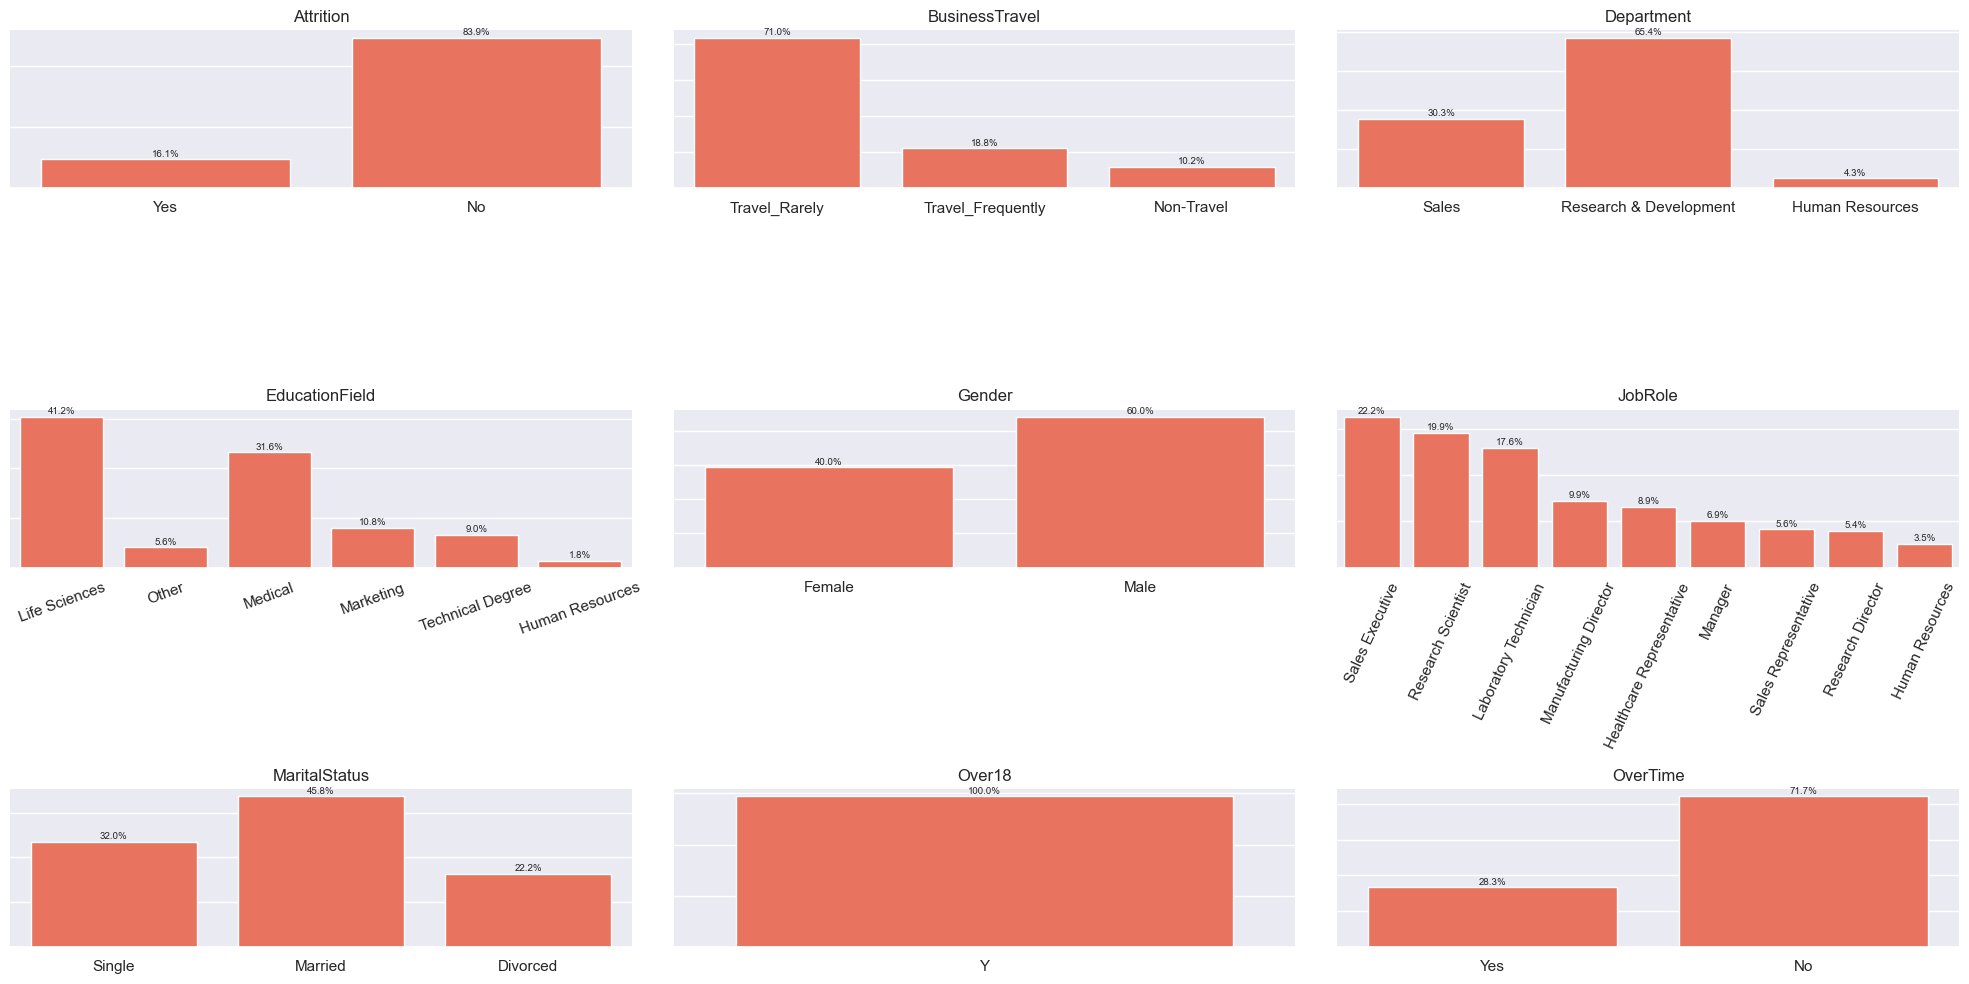

In [6]:
CatVar = hrdata.select_dtypes(include=['object'])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for i, col in enumerate(CatVar):
    row_id = int(i / 3)
    col_id = int(i % 3)
    sb.countplot(data=hrdata, x=col, color='#FF6347', ax=axes[row_id, col_id])
    axes[row_id, col_id].set_xlabel('')
    axes[row_id, col_id].set_title(col, fontsize=12)

total = len(hrdata)
for rows in axes:
    for ax in rows:
        ax.set_yticklabels([])
        ax.set_ylabel('')
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7)


axes[1, 0].tick_params(axis='x', rotation=20)
axes[1, 2].tick_params(axis='x', rotation=65)

sb.despine(left=True, )
plt.tight_layout()

Based on the bar graph shown, given that the 'Over18' variable has only one distinct value, it is redundant and can be safely omitted. The data reveals that the majority of employees are engaged in Research & Development, with infrequent travel and minimal overtime. Notably, there's a significant disproportion between attrition and non-attrition cases, necessitating resampling before training the machine learning model to address this imbalance.


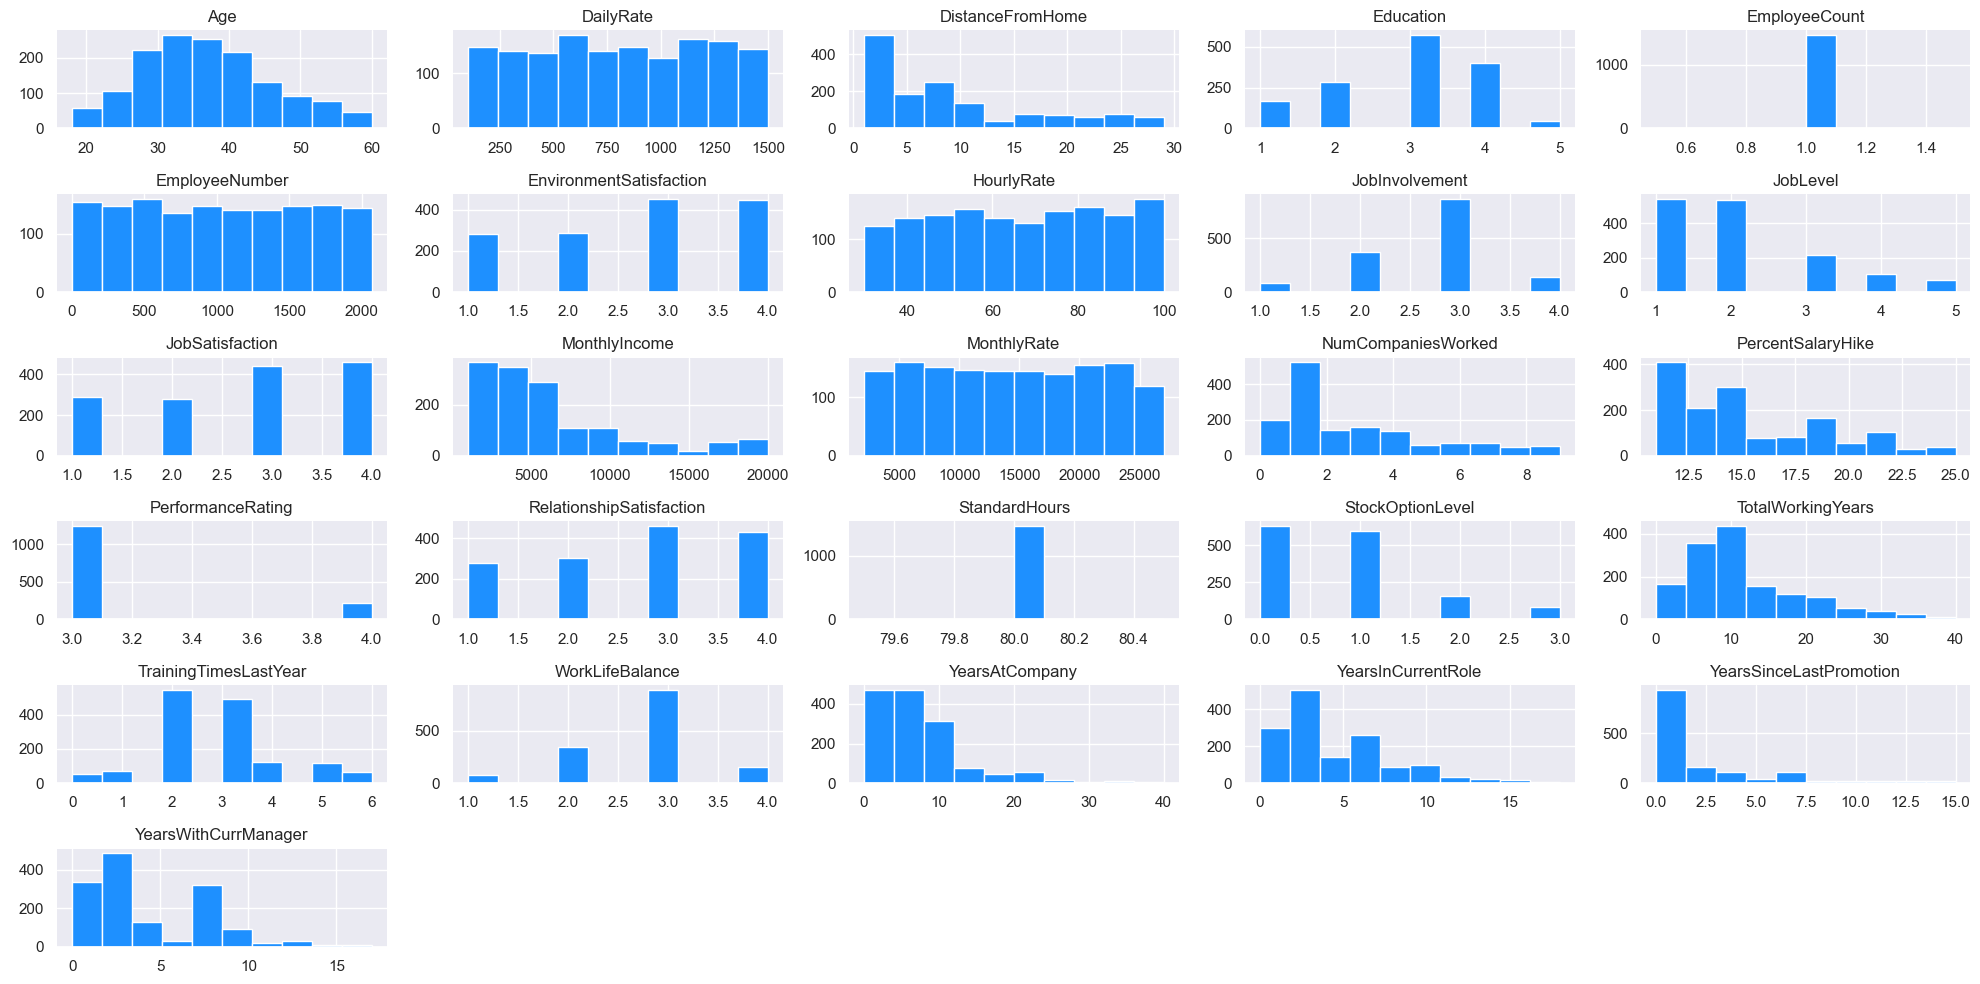

In [7]:
NumVar = hrdata.select_dtypes(include=['int64'])

hrdata[NumVar.columns].hist(color='#1E90FF', figsize=(20, 10))
sb.despine(left=True)
plt.tight_layout()
plt.show()

Categorical variables with int64 data type:
* education
* environment satisfaction
* job involvement 
* job level
* job satisfaction
* performance rating
* RelationshipSatisfaction
* stockoptionlevel
* trainingtimeslastyear
* Worklifebalance

Redundant Variables (Has only 1-2 unique values, making it redundant for analysis and can be removed):
* PerformanceRating
* StandardHours
* EmployeeCount


In [8]:
duplicated_columns = hrdata.columns[hrdata.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Duplicated columns:", duplicated_columns)
    duplicated_columns_df = df[duplicated_columns]
    print("Data for duplicated columns:")
    print(duplicated_columns_df)

else:
    print("No duplicated columns found.")

No duplicated columns found.


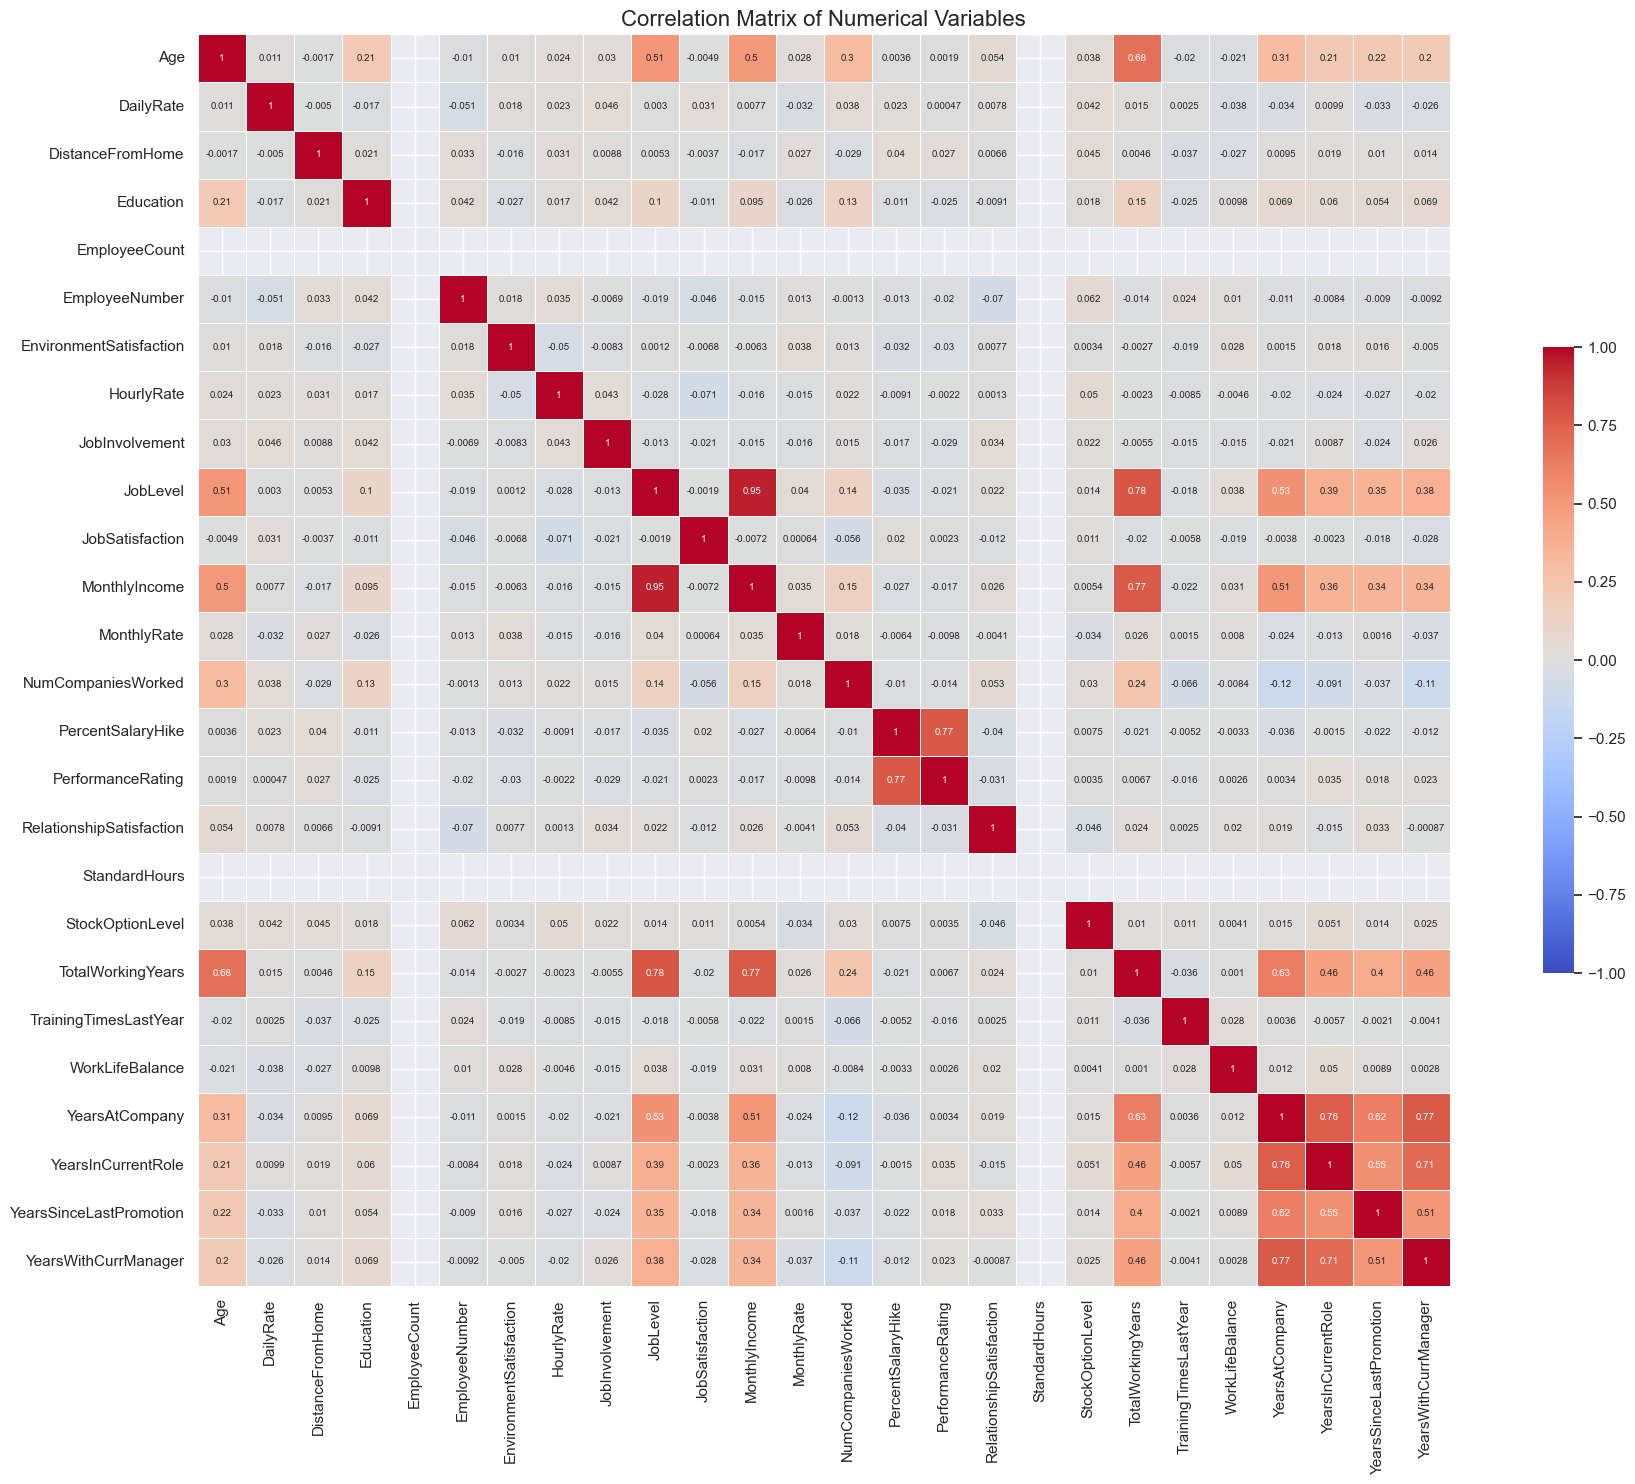

In [9]:
corr = NumVar.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontsize": 7})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.yticks(rotation=0)  # Ensure y-axis labels are not rotated
plt.tight_layout()
plt.show()

The correlation analysis indicates a clear, strong positive relationship between 'TotalWorkingYears' and both 'JobLevel' and 'MonthlyIncome'. Additionally, 'YearsInCurrentRole' shows a strong positive correlation with 'YearsWithCurrentManager' and 'YearsAtCompany'. Therefore, we will delve deeper into these attributes and their interrelationships.

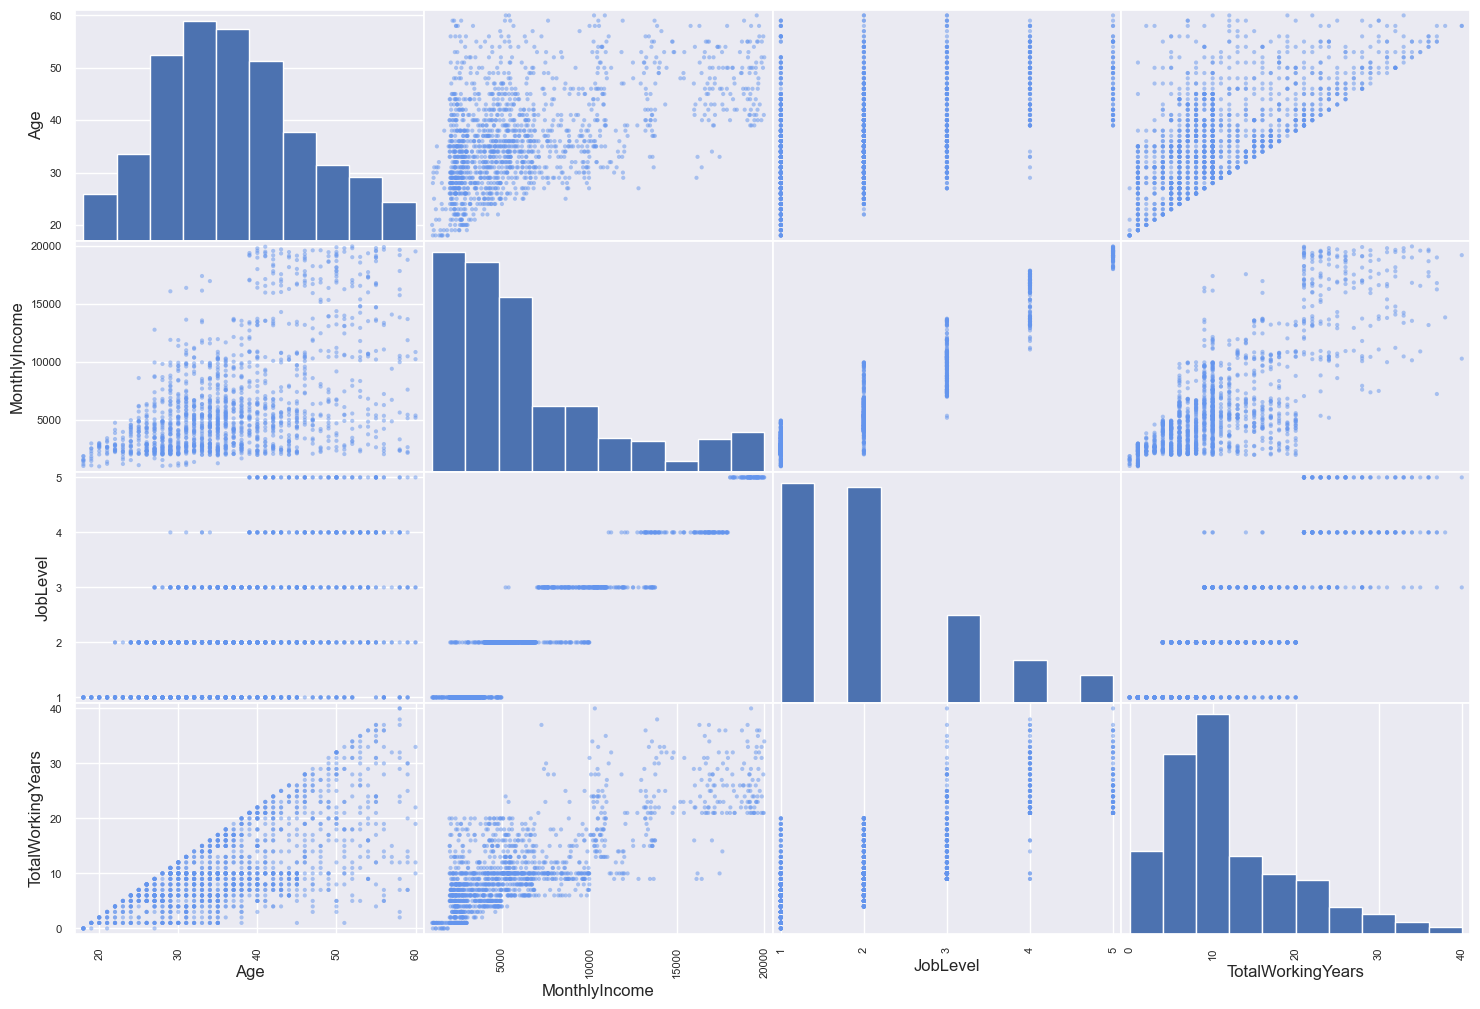

In [10]:
attri1 = ['Age', 'MonthlyIncome','JobLevel','TotalWorkingYears']
scatter_matrix(hrdata[attri1], color='cornflowerblue', figsize=(18, 12));
plt.show()

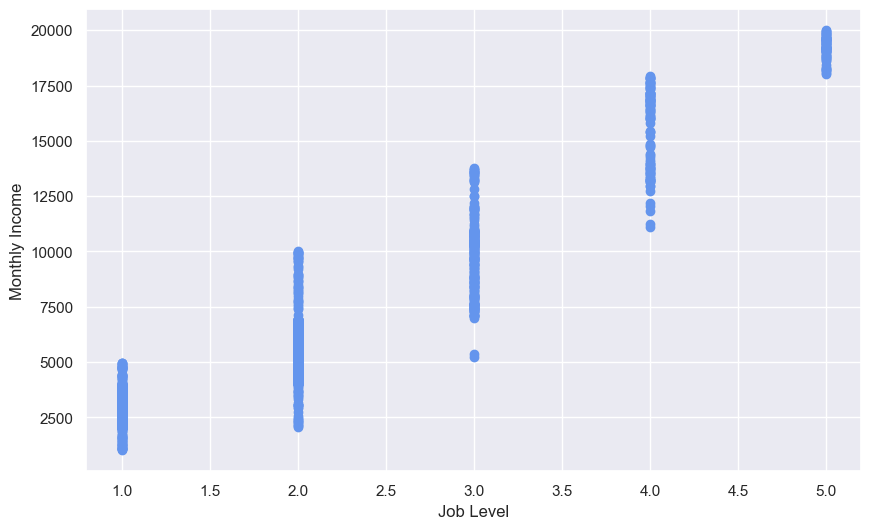

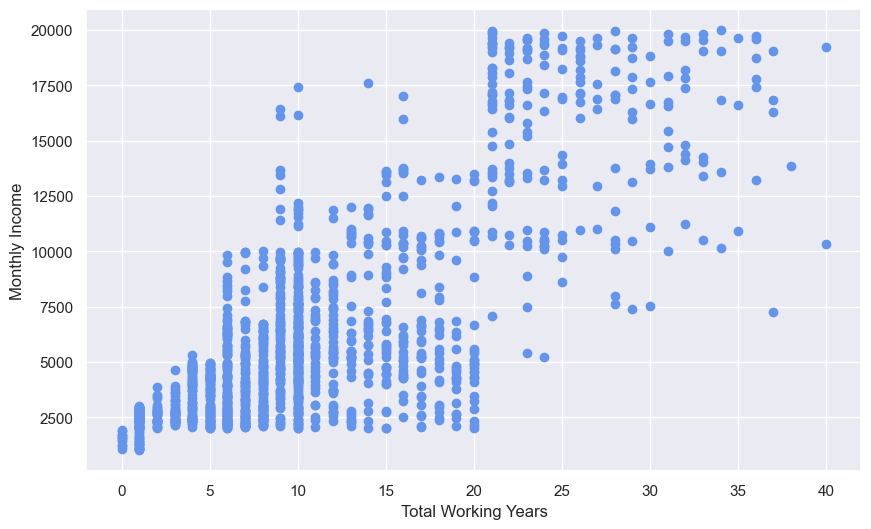

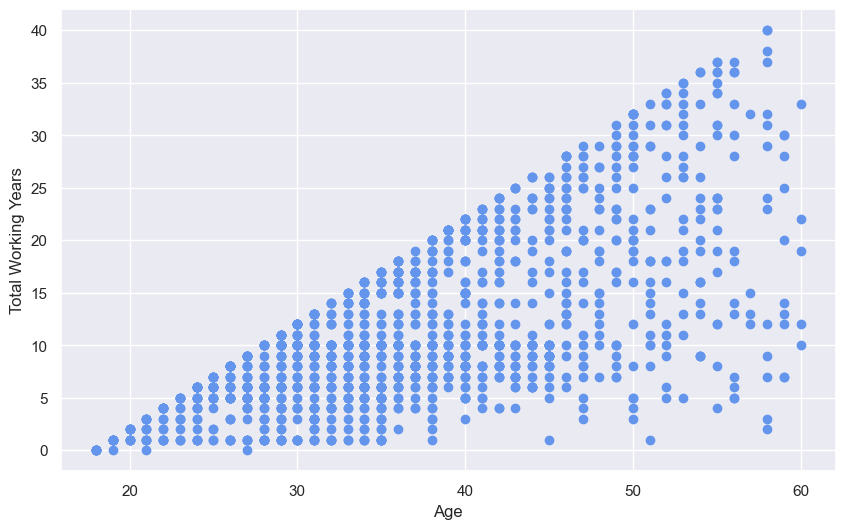

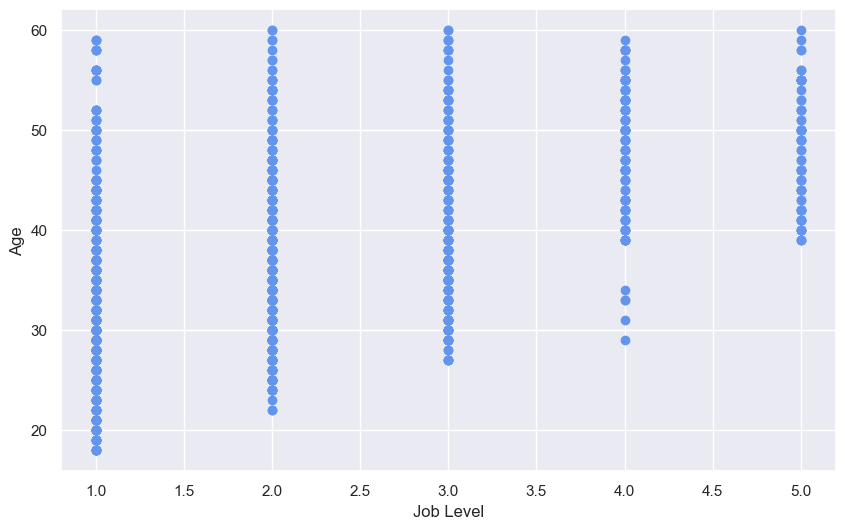

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(hrdata['JobLevel'], hrdata['MonthlyIncome'], color='cornflowerblue')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(hrdata['TotalWorkingYears'], hrdata['MonthlyIncome'], color='cornflowerblue')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(hrdata['Age'], hrdata['TotalWorkingYears'], color='cornflowerblue')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(hrdata['JobLevel'],hrdata['Age'], color='cornflowerblue')
plt.ylabel('Age')
plt.xlabel('Job Level')
plt.show()



**Based on the scatter matrix, here are a few observations:**

Monthly Income vs Job Level: There appears to be a positive correlation between monthly income and job level. This means that people with higher job levels tend to have higher monthly incomes.

Monthly Income vs Total Working Years: The scatter plot suggests a possible positive correlation between monthly income and total working years. People with more working experience may tend to have higher incomes.

Age vs Total Working Years: As expected, there appears to be a positive correlation between age and total working years. People tend to accumulate more working years as they age.

Job Level vs Age: There seems to be a positive correlation between job level and age. This could be because people tend to gain experience and move into higher job levels as they age.

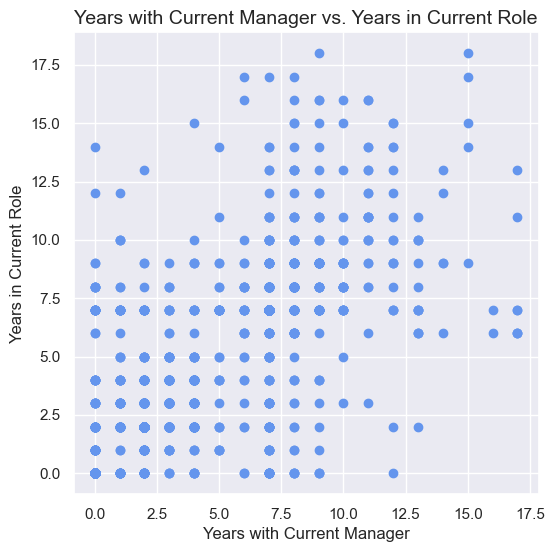

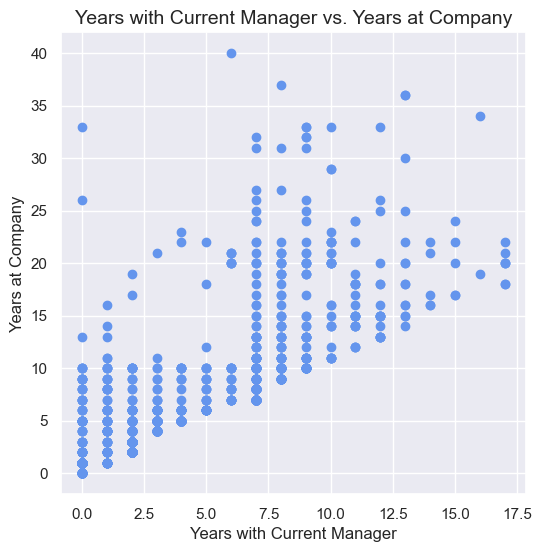

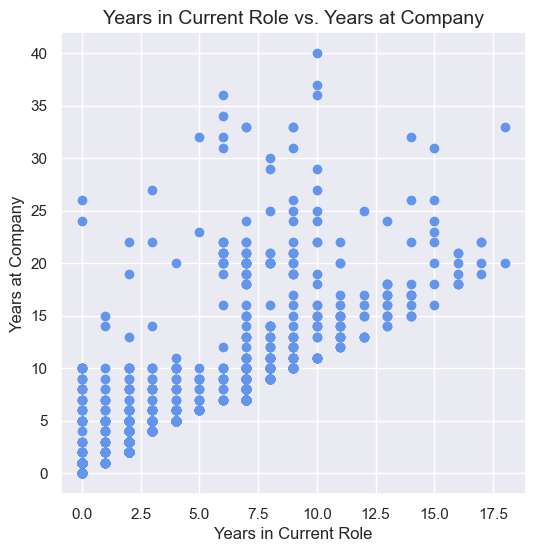

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(hrdata['YearsWithCurrManager'], hrdata['YearsInCurrentRole'], color='cornflowerblue')
plt.xlabel('Years with Current Manager')
plt.ylabel('Years in Current Role')
plt.title('Years with Current Manager vs. Years in Current Role', fontsize=14)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(hrdata['YearsWithCurrManager'], hrdata['YearsAtCompany'], color='cornflowerblue')
plt.xlabel('Years with Current Manager')
plt.ylabel('Years at Company')
plt.title('Years with Current Manager vs. Years at Company', fontsize=14)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(hrdata['YearsInCurrentRole'], hrdata['YearsAtCompany'], color='cornflowerblue')
plt.xlabel('Years in Current Role')
plt.ylabel('Years at Company')
plt.title('Years in Current Role vs. Years at Company', fontsize=14)
plt.show()


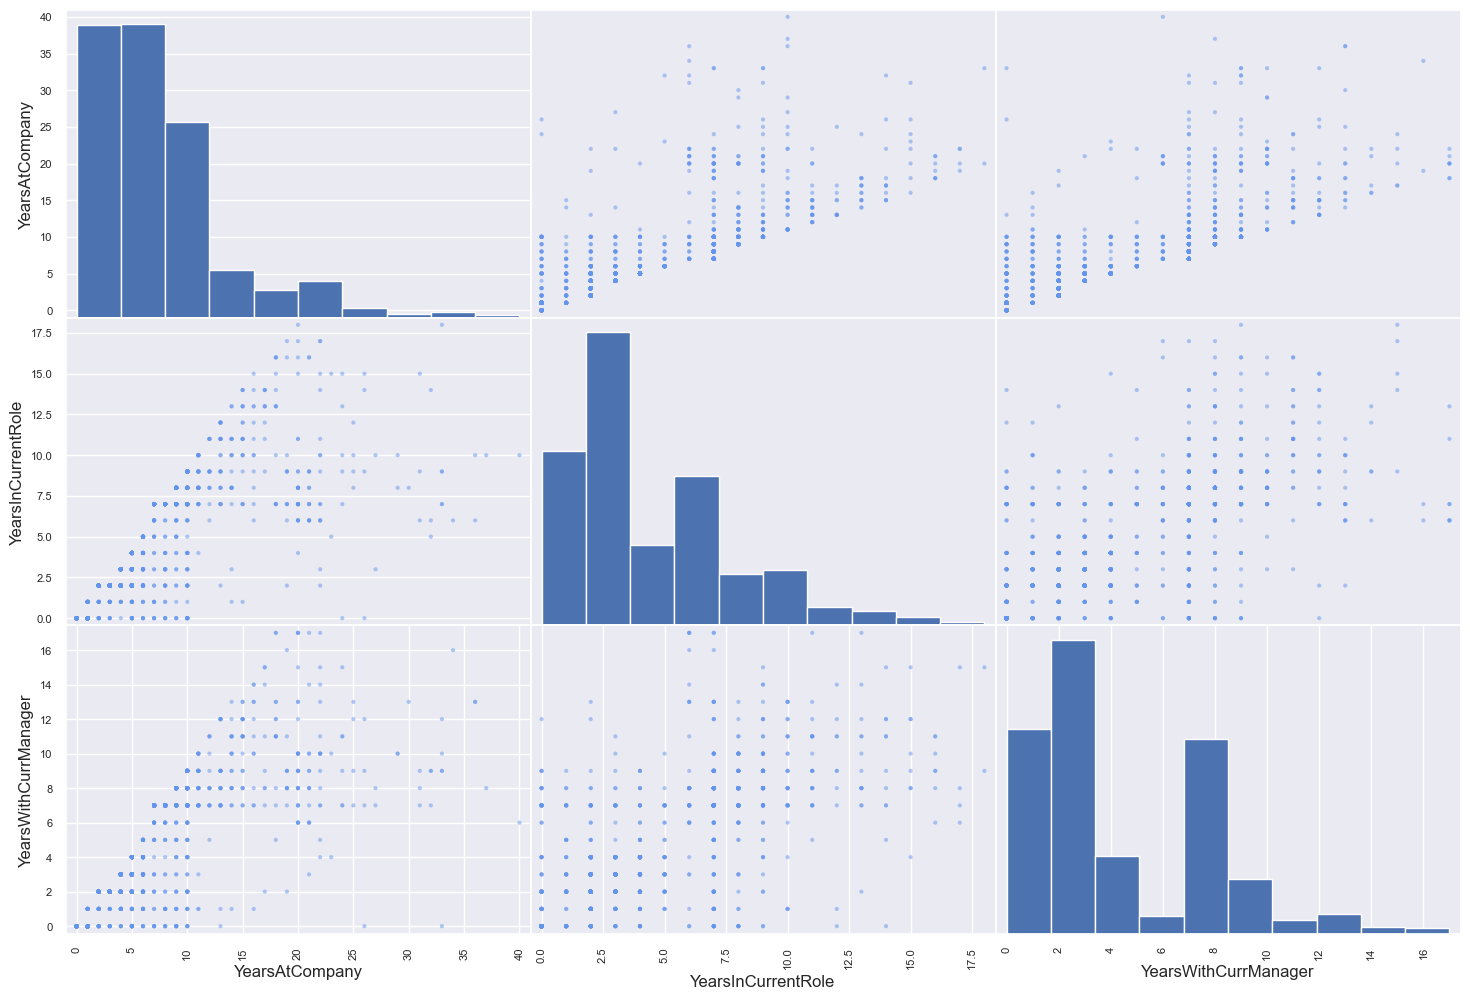

In [13]:
attri2 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
scatter_matrix(hrdata[attri2], color='cornflowerblue', figsize=(18, 12));

**Based on the scatter matrix, here are a few observations:**

Years with Current Manager vs. Years in Current Role: There appears to be a weak positive correlation between the number of years with the current manager and the number of years in the current role. This means that people who have been with their current manager for a longer time tend to have also been in their current role for a longer time. This is likely due to people staying with a manager they like.

Years with Current Manager vs. Years at Company: The scatter plot suggests a weak positive correlation between the number of years with the current manager and the number of years at the company. People who have been with their manager for a longer time also tend to have been at the company longer. This could be because they are happy with their manager and the company, or it could be due to other factors such as industry norms or lack of mobility in their field.

Years in Current Role vs. Years at Company: The data shows a positive correlation between the number of years in the current role and the number of years at the company. People who have been in their current role for a longer time tend to have also been at the company longer. This is likely because people who stay in a role for a long time are likely to stay with the company as well.

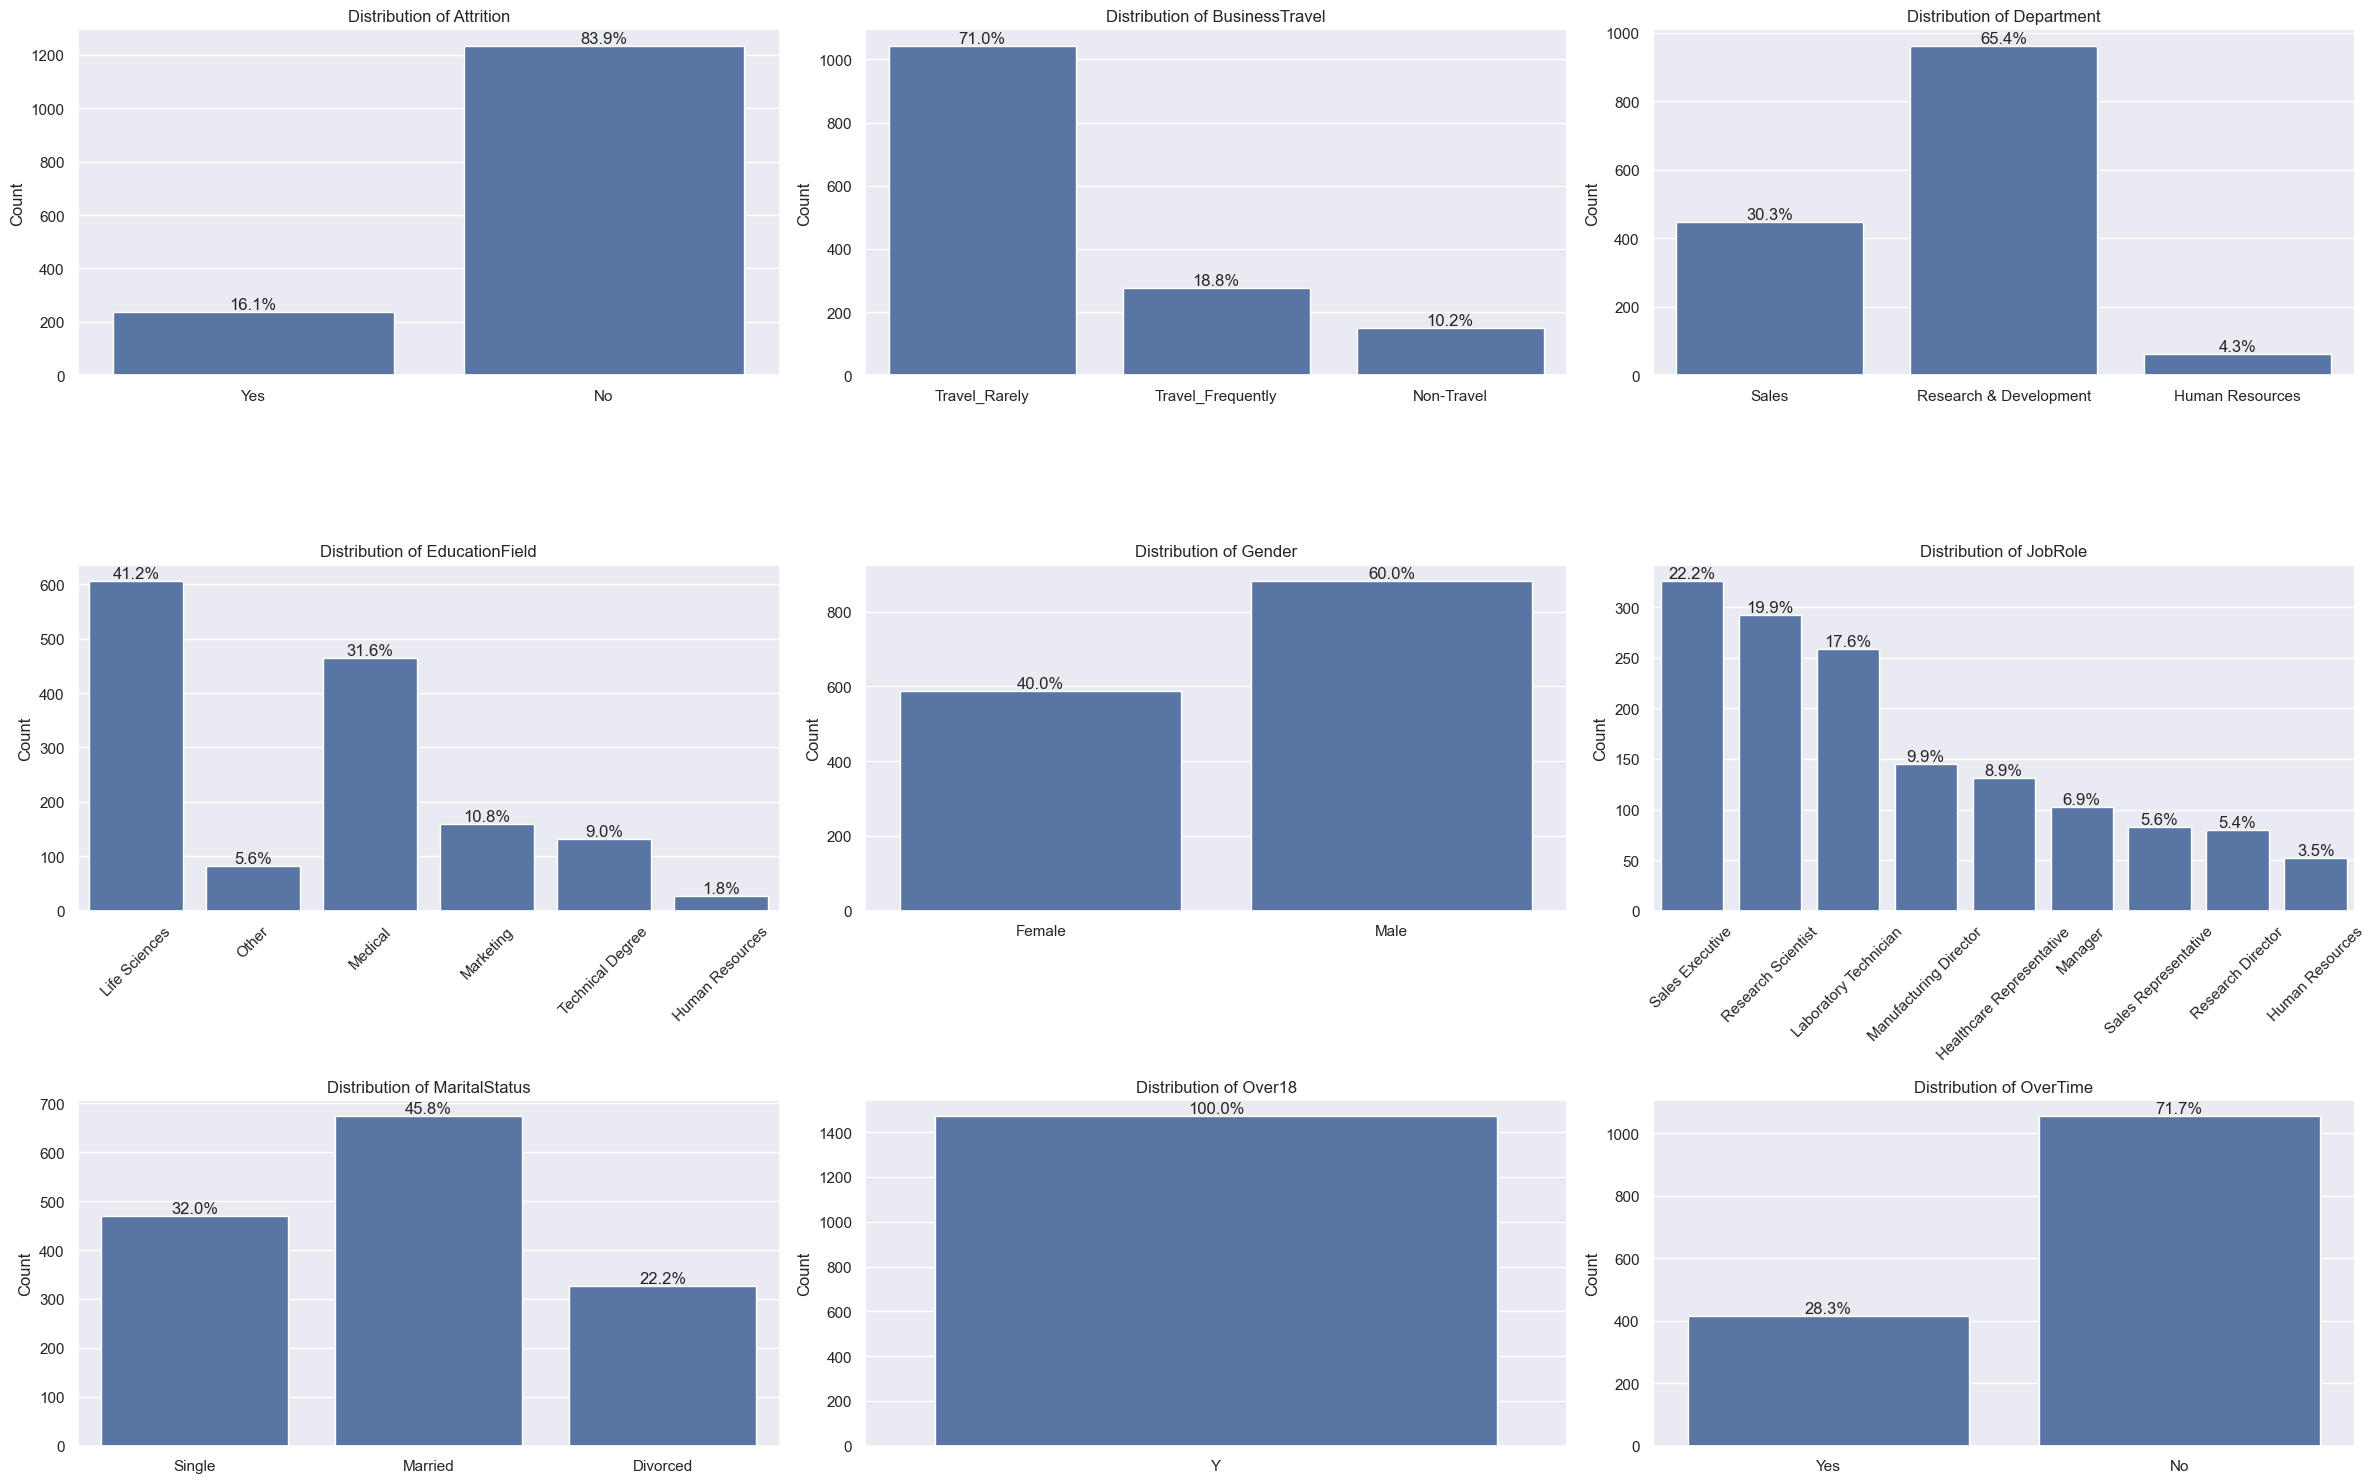

In [14]:


categorical_columns = hrdata.select_dtypes(include='object').columns

# Determine grid size based on the number of columns (adjust as needed)
grid_width = 3  # Adjust based on desired number of columns per row
grid_height = (len(categorical_columns) // grid_width) + (len(categorical_columns) % grid_width > 0)

# Configure plot size based on grid dimensions
plt.figure(figsize=(grid_width * 8, grid_height * 5))

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Create a subplot for each column
    plt.subplot(grid_height, grid_width, i + 1)

    # Create a countplot with Seaborn
    ax = sb.countplot(x=col, data=hrdata)  # Get the underlying axes object

    # Access container objects (bars) created by Seaborn
    containers = ax.containers

    # Calculate total non-null values
    total = len(hrdata[col].dropna())

    # Loop through container objects and add annotations
    for c in containers:
        patches = c.patches  # Access patches within each container
        for p in patches:
            height = p.get_height()
            plt.text(p.get_x() + p.get_width() / 2,
                     height + 0.1,  # Adjust vertical position for better visibility
                     '{:.1f}%'.format((height / total) * 100),
                     ha='center', va='bottom')

    # Customize plot for readability
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    ax.set_xlabel('')  # Remove x-axis label using the current axis object
    if i == 3 or i== 5:  # Index for the fifth plot (i starts from 0)
        plt.xticks(rotation=45)


# Adjust layout and display plots
plt.tight_layout()
plt.show()


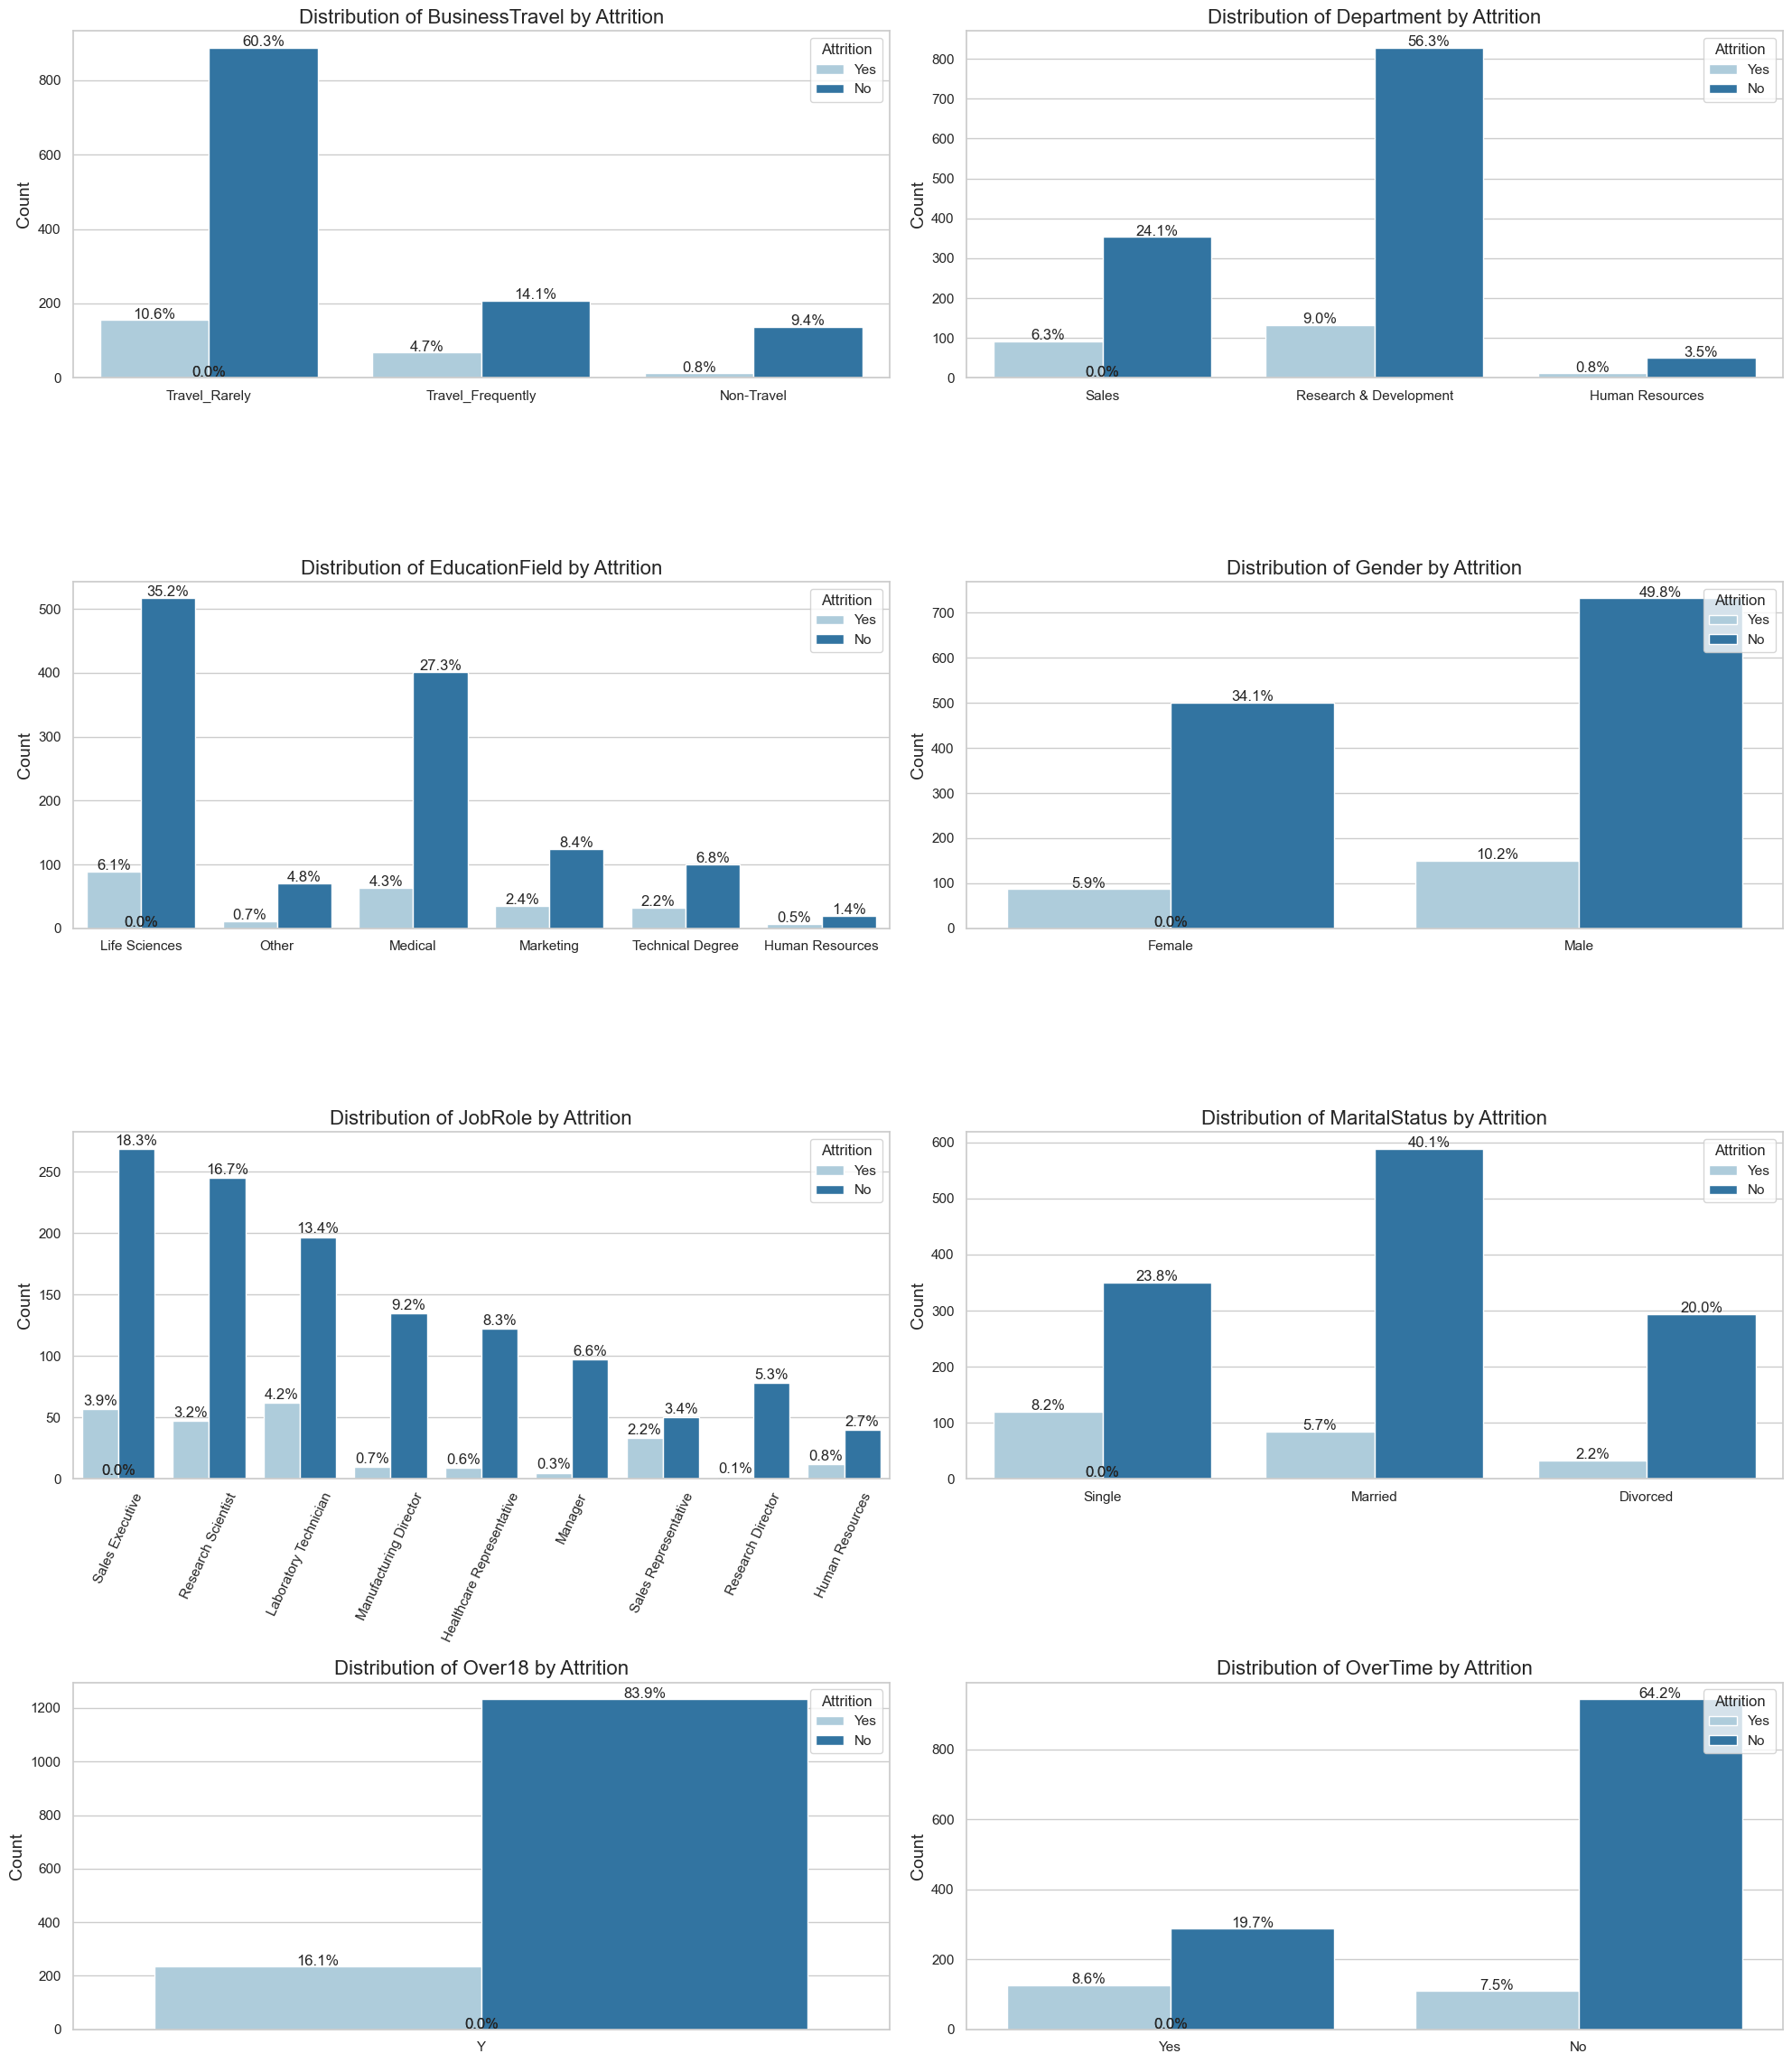

In [15]:

# Set the overall style
sb.set(style="whitegrid")

# Get categorical columns
categorical_columns = hrdata.select_dtypes(include='object').columns
# Remove 'Attrition' from categorical_columns
categorical_columns = categorical_columns.drop('Attrition')


# Determine grid size based on whether the number of columns is even or odd
if len(categorical_columns) % 2 == 0:
    grid_size = (len(categorical_columns) // 2, 2)
else:
    grid_size = (len(categorical_columns) // 2 + 1, 2)

fig, axes = plt.subplots(*grid_size, figsize=(20,23))

# Flatten axes for easy iteration
axes = axes.flatten()
palette = "Paired"

# Loop through categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    ax = sb.countplot(x=column, hue='Attrition', data=hrdata, palette=palette, ax=axes[i])
    
    # Set title and labels
    ax.set_title(f"Distribution of {column} by Attrition", fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title='Attrition', loc='upper right')
    axes[i].set_xlabel('')
    
    total = len(hrdata[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.1f}%'.format((height / total) * 100),
                ha="center")
    

axes[4].tick_params(axis='x', rotation=65)
    
# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()


With the distribution graphs above, we can see that employees who travel less (Non-Travel 9.4% or Travel_Rarely 60.3%) have a significantly lower attrition rate than those who travel frequently (Travel_Frequently 4.7%). Travel_Frequently has the highest attrition rate (4.7%) among all categories in BusinessTravel. Frequent travel might be causing stress or work-life balance issues, leading to higher attrition rates among employees who travel frequently. It also suggests that employees who don't travel may be more satisfied with their work-life balance, potentially preferring Work From Home (WFH).

For Department, attrition is the lowest in Research & Development (9.0%), followed by Sales (6.3%) and Human Resources (0.8%). Despite having the lowest attrition rate, Research & Development also has the highest percentage of employees who do not leave the company (56.3%).

In EducationField, employees with a Life Sciences (35.2% or 6.1%) or Medical (27.3% or 4.3%) background make up the majority of the workforce, and both groups have low attrition.

In the gender column, male employees tend to have higher attrition rates (10.2%) as compared to female employees (5.9%). But the attrition rate is not that big, so we can assume there are no gender discrimination.

Some insights that we see from Job Role is that Research Scientists (3.2%) and Laboratory Technicians (4.2%) show higher attrition rates compared to other job roles, while Research Directors (0.1%) and Managers (0.3%) have the lowest attrition rates. Sales Representatives have the highest attrition rate (2.2%) among all Sales-related job roles.

We also discovered that single employees have the highest attrition rate (8.2%), while married (5.7%) and divorced (2.2%) employees have relatively lower attrition which could be influenced by various factors such as work-life balance, job flexibility, or career growth opportunities. 

For Overtime column, we realized that employees who work overtime have a slightly higher attrition rate (8.6%) compared to those who do not work overtime (7.5%). The slightly higher attrition rate among employees who work overtime suggests that long working hours could contribute to employee dissatisfaction.

This analysis shows that JobRole, Overtime, and BusinessTravel might be important fields to take note of.

C:\Users\prist\AppData\Local\Temp\ipykernel_22100\3916660856.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.boxplot(x='Attrition', y=column, data=hrdata, palette=palette, ax=axes[i])
C:\Users\prist\AppData\Local\Temp\ipykernel_22100\3916660856.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Attrition', 'Attrition'])
C:\Users\prist\AppData\Local\Temp\ipykernel_22100\3916660856.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.boxplot(x='Attrition', y=column, data=hrdata, palette=palette, ax=axes[i])
C:\Users\prist\AppData\Local\Temp\ipykernel_22100\3916660856.py:36: UserWarning:

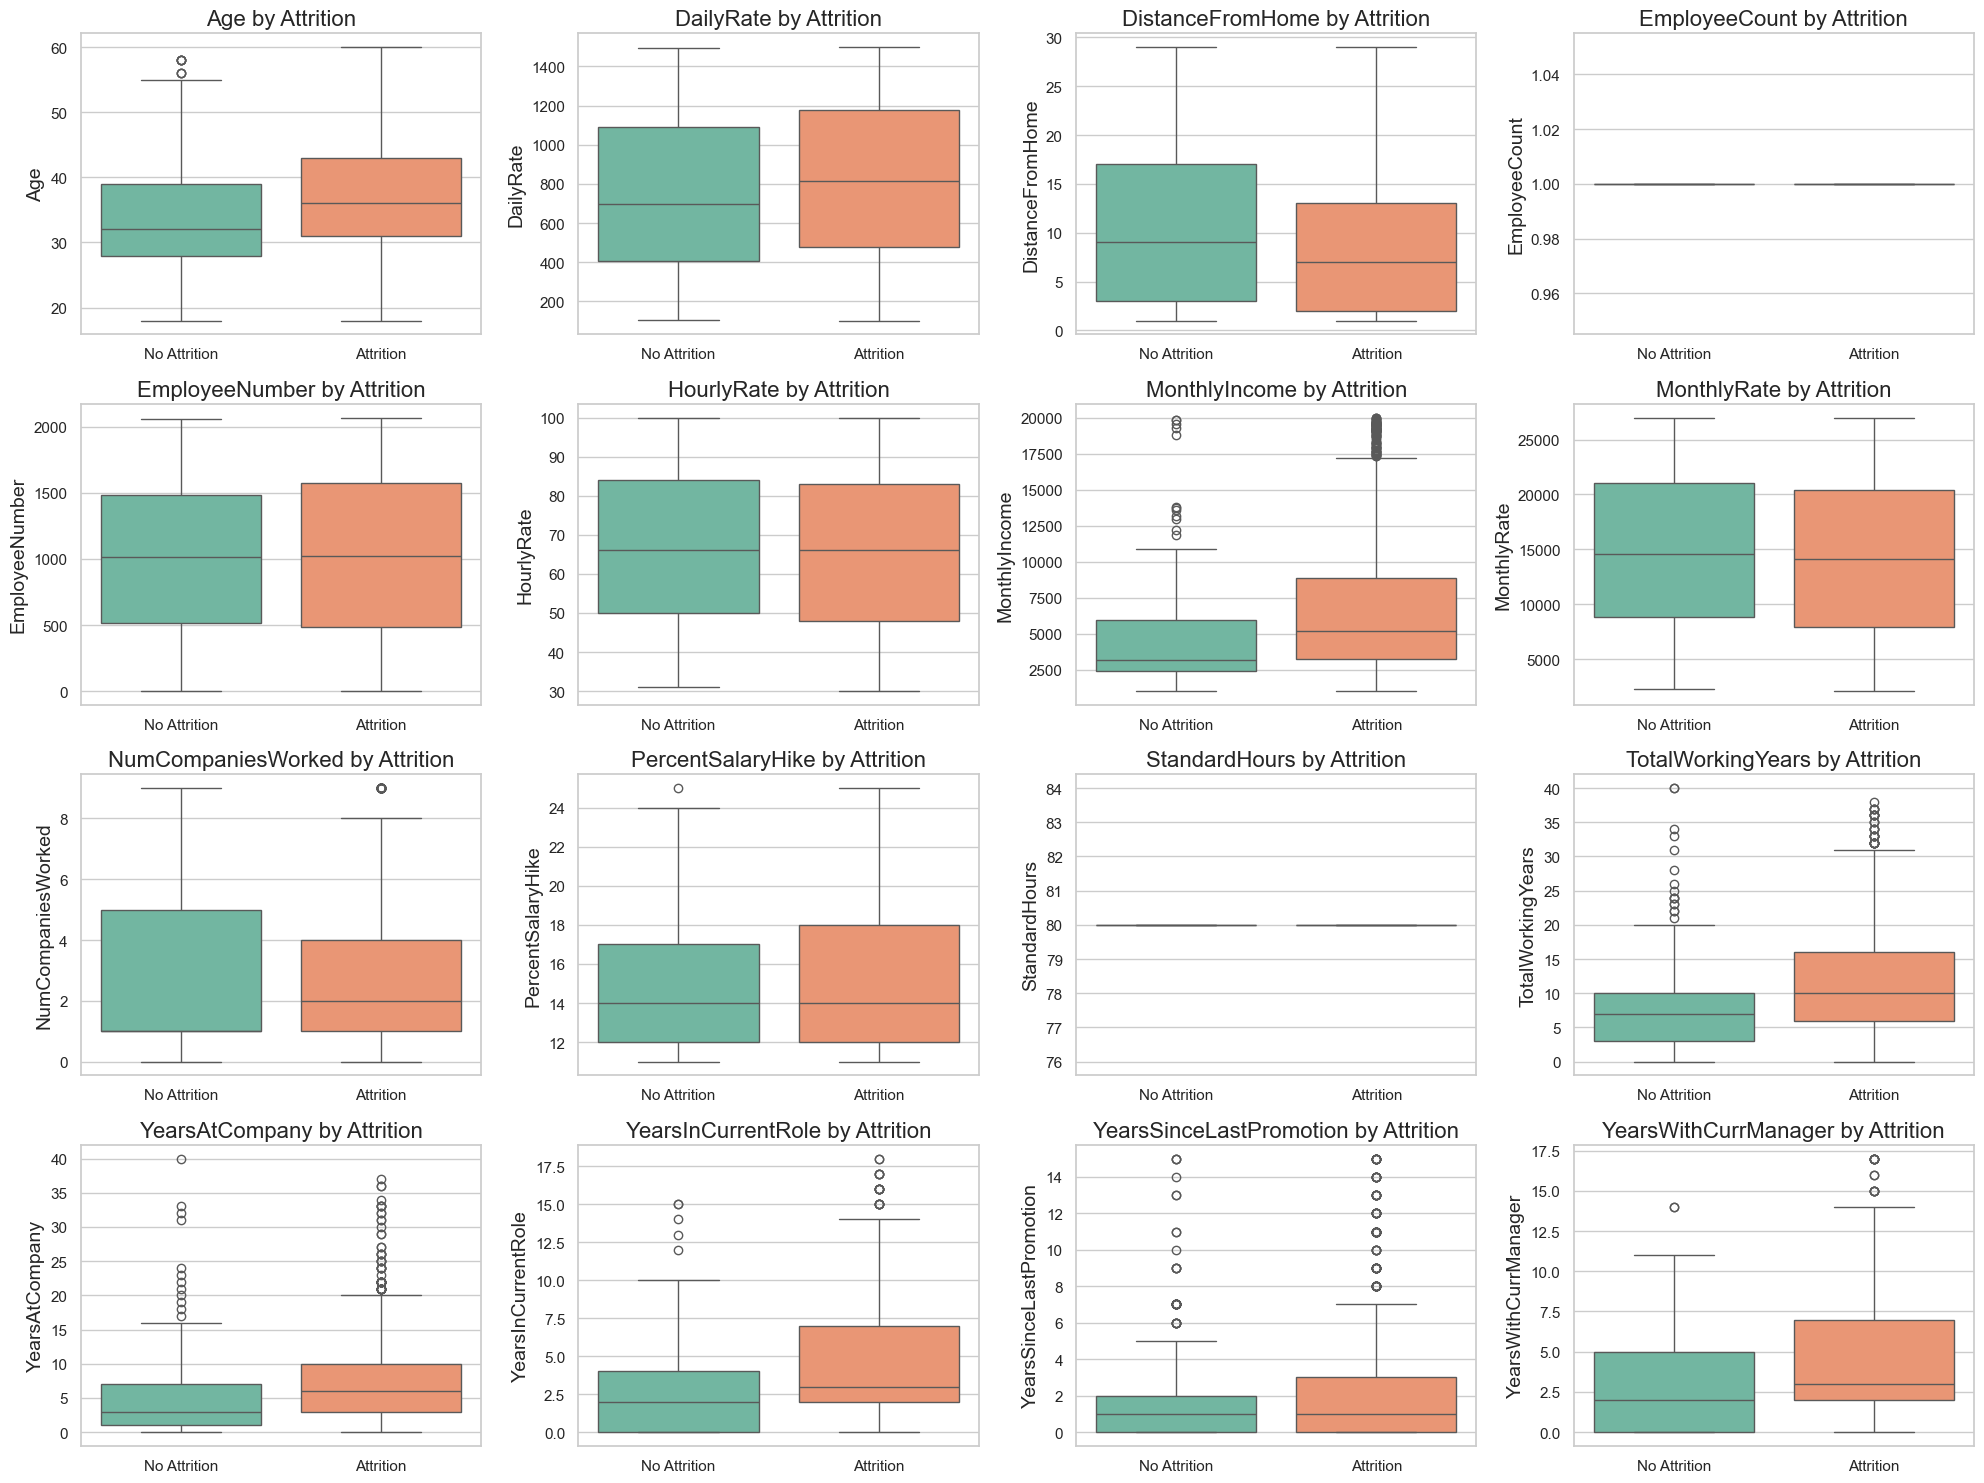

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set the overall style
sb.set(style="whitegrid")

# Get numerical columns
numerical_columns = hrdata.select_dtypes(include=['int64']).columns

# Drop categorical variables with int64 data type
columns_to_drop = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel',
    'TrainingTimesLastYear', 'WorkLifeBalance'
]
numerical_columns = numerical_columns.drop(columns_to_drop)

# Determine grid size
grid_size = (4, len(numerical_columns) // 4 + (1 if len(numerical_columns) % 4 != 0 else 0))

fig, axes = plt.subplots(*grid_size, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()
palette = "Set2"

# Loop through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    ax = sb.boxplot(x='Attrition', y=column, data=hrdata, palette=palette, ax=axes[i])
    
    # Set title and labels
    ax.set_title(f"{column} by Attrition", fontsize=16)
    ax.set_xlabel('Attrition', fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.set_xticklabels(['No Attrition', 'Attrition'])
    axes[i].set_xlabel('')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()


Based on the lack of variation observed in the box plots, we have decided to drop the following attributes from our analysis:
- EmployeeCount
- HourlyRate
- EmployeeNumber
- MonthlyRate
- StandardHours





### Dropping Redundant and Unnecessary Columns

Dropping the categorical variables with int64 data type

In [17]:
# Create another DataFrame containing only numerical varaibles 
int64_df = hrdata.select_dtypes(include=['int64'])
int64_df.drop(['JobInvolvement','Education','RelationshipSatisfaction','JobSatisfaction','JobLevel','EnvironmentSatisfaction','PerformanceRating','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance'],axis=1,inplace=True)

# Print information about the new DataFrame
print(int64_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   EmployeeCount            1470 non-null   int64
 4   EmployeeNumber           1470 non-null   int64
 5   HourlyRate               1470 non-null   int64
 6   MonthlyIncome            1470 non-null   int64
 7   MonthlyRate              1470 non-null   int64
 8   NumCompaniesWorked       1470 non-null   int64
 9   PercentSalaryHike        1470 non-null   int64
 10  StandardHours            1470 non-null   int64
 11  TotalWorkingYears        1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
 13  YearsInCurrentRole       1470 non-null   int64
 14  YearsSinceLastPromotion  1470 non-null   int64
 15  Year

In total, the following attributes are being removed from consideration due to their limited variability, relevance, and having only 1-2 unique values:
- PerformanceRating
- StandardHours
- EmployeeCount
- Over18
- EmployeeNumber
- HourlyRate
- MonthlyRate

By dropping attributes with limited variability, we have streamlined our analysis to focus on key factors that offer meaningful insights into employee behaviour. This optimization process enhances the predictive power and interpretability of our models, enabling us to develop more accurate retention strategies to address attrition challenges effectively.


In [18]:
# Dropping unnecessary columns

columns_drop1 = ['PerformanceRating',
'StandardHours',
'EmployeeCount',
'Over18',
'EmployeeNumber',
'HourlyRate',
'MonthlyRate'] 

cleaned_dropped_hrdata1 = hrdata.drop(columns_drop1, axis=1)

cleaned_dropped_hrdata1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_dropped_hrdata1, test_size=0.2, random_state=123, stratify=hrdata.Attrition)
print('Shapes:', train_df.shape, test_df.shape)

Shapes: (1176, 28) (294, 28)


In [20]:
y_train = train_df['Attrition'].copy() #response
x_train = train_df.drop(columns='Attrition') #predictor

y_test = test_df['Attrition'].copy()  # Response
x_test = test_df.drop(columns='Attrition')  # Predictor


Oversampling is not done to the test dataframe so as to not cause data leakage, and to preserve the real life attrition distribution proportions.

In [21]:
# Dropping unnecessary columns

columns_drop2 = ['PerformanceRating',
'StandardHours',
'EmployeeCount',
'Over18',
'EmployeeNumber',
'HourlyRate',
'MonthlyRate','Attrition'] 
#drop attrition as well because target variable we are trying to predict should not be included in predictors

cleaned_dropped_hrdata2 = hrdata.drop(columns_drop2, axis=1)

cleaned_dropped_hrdata2.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
NumVar = train_df.select_dtypes(include=['int64'])
CatVar = train_df.select_dtypes(include=['object'])

#both cat and num variables do not include attribute
categorical_attrs = list(set(CatVar.columns) - set(columns_drop2))
numerical_attrs = list(set(NumVar.columns) - set(columns_drop2))

print("Categorical Attributes:")
print(categorical_attrs)

print("\nNumerical Attributes:")
print(numerical_attrs)

Categorical Attributes:
['JobRole', 'BusinessTravel', 'Gender', 'EducationField', 'Department', 'OverTime', 'MaritalStatus']

Numerical Attributes:
['StockOptionLevel', 'DailyRate', 'RelationshipSatisfaction', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'JobSatisfaction', 'Education', 'TrainingTimesLastYear', 'TotalWorkingYears', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked', 'DistanceFromHome', 'Age', 'YearsAtCompany', 'PercentSalaryHike', 'WorkLifeBalance', 'MonthlyIncome', 'EnvironmentSatisfaction']


In [23]:
#Note this does not include attribute because x_train consists of the predictors
#x_train = x_train[categorical_attrs+numerical_attrs].copy()
#x_train.shape

# **Feature Engineering**

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [25]:
# to transform categorical labels into numerical values.
encoder = LabelEncoder()
#Transforms y_train and y_test into numerical labels, replaces the original categorical values with integers
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(test_df['Attrition'])

assert y_train.sum() == train_df[train_df.Attrition=='Yes'].shape[0] #used to check if count match

In [26]:
#The purpose of this pipeline is to preprocess and transform the 
#features in the x_train data before feeding it into a machine learning model

# Create a transformation pipeline
custom_transformer = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_attrs),
    ('categorical', OneHotEncoder(), categorical_attrs),
], remainder='drop')

# Apply the transformation to the training data
x_train = custom_transformer.fit_transform(x_train)

# Apply the transformation to the test data
x_test = custom_transformer.transform(x_test)





# Resampling

As mentioned above in the EDA, resampling is required because there are many more cases of non-attrition compared to attrition to balance the dataset. Imbalanced datasets can lead machine learning algorithms to perform poorly, as the model tends to be biased towards the majority. As there are 1470 employees in the dataset, it is a small number. Therefore, we have to OVER-SAMPLE so that we can avoid any data lost. The dataset will then bloat the attrition cases as a result.

We decided to use **SMOTE** (Synthetic Minority Over-sampling Technique) as our oversampling method. SMOTE works by creating synthetic samples from the minority class by selecting similar instances and interpolating between them.

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [28]:
feature_names = []

for i in custom_transformer.transformers_:
    if hasattr(i[1], 'get_feature_names_out'):
        names = i[1].get_feature_names_out(i[2])  
    else:
        names = [f"{i[0]}_{j}" for j in i[2]] 
    feature_names.extend(names)

# Create a DataFrame with the transformed x_train and feature names
transformed_df = pd.DataFrame(data=x_train_smote, columns=feature_names)

# Print the transformed DataFrame
transformed_df

,StockOptionLevel,DailyRate,RelationshipSatisfaction,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole,JobSatisfaction,Education,TrainingTimesLastYear,TotalWorkingYears,...,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.408949,1.138290,1.185974,1.376601,-0.364021,1.031553,1.159153,-0.895430,-0.615044,-0.026831,...,0.0,0.000000,0.0,1.00000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000
1,-0.936308,0.962398,-1.555911,0.813903,0.569312,0.757157,-1.576293,0.072424,-0.615044,-0.287599,...,0.0,1.000000,0.0,0.00000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
2,-0.936308,-0.447220,1.185974,0.813903,2.124869,-0.340429,1.159153,1.040279,0.160188,-0.157215,...,0.0,0.000000,0.0,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000
3,-0.936308,0.501609,1.185974,0.813903,1.502646,0.757157,1.159153,-0.895430,2.485885,-0.157215,...,0.0,0.000000,0.0,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
4,0.236320,-0.640455,0.272012,-0.592843,-0.364021,-0.340429,-1.576293,1.040279,0.160188,-0.287599,...,0.0,0.000000,0.0,1.00000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,-0.936308,-0.759049,0.272012,-0.592843,-0.129862,-0.614825,-0.664478,-0.406362,0.160188,-1.168040,...,0.0,0.247344,0.0,0.00000,1.00000,0.752656,0.247344,0.000000,0.000000,1.000000
1968,-0.936308,0.635539,0.272012,-1.009329,-0.513455,-1.021020,0.922228,0.323911,0.160188,-1.296795,...,0.0,0.259840,0.0,0.25984,0.74016,0.740160,0.259840,0.000000,0.000000,1.000000
1969,-0.936308,-0.621743,-1.555911,0.813903,1.502646,-0.614825,0.227340,0.093651,-0.598041,-0.536930,...,0.0,0.000000,0.0,1.00000,0.00000,1.000000,0.000000,0.000000,0.021932,0.978068
1970,-0.537540,-1.602479,0.582818,-1.155541,-0.675133,-1.163618,-0.974553,0.072424,-0.103440,-1.330674,...,0.0,0.000000,0.0,1.00000,0.00000,0.659936,0.340064,0.340064,0.000000,0.659936


In [29]:
transformed_test_df = pd.DataFrame(data=x_test, columns=feature_names)
transformed_test_df

,StockOptionLevel,DailyRate,RelationshipSatisfaction,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole,JobSatisfaction,Education,TrainingTimesLastYear,TotalWorkingYears,...,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.936308,0.548678,0.272012,-0.592843,-0.364021,-0.340429,1.159153,0.072424,-0.615044,-0.678752,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.936308,-1.554601,0.272012,-0.874192,-0.675133,-0.614825,1.159153,1.040279,2.485885,-0.417984,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.936308,-0.855985,0.272012,1.939299,0.880424,1.854743,-1.576293,1.040279,-0.615044,0.625091,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.236320,-0.016160,0.272012,-0.311494,-0.675133,-0.066032,-0.664478,0.072424,1.710652,-0.678752,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.936308,1.390981,-0.641949,-0.030145,-0.364021,-1.163618,-1.576293,-1.863284,0.160188,-0.678752,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.936308,0.997081,-0.641949,-0.311494,-0.675133,-0.340429,-1.576293,1.040279,0.935420,-0.157215,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
290,-0.936308,-0.551270,0.272012,2.501997,-0.052910,0.757157,0.247338,1.040279,0.160188,1.146628,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
291,0.236320,1.237385,-1.555911,-0.874192,-0.675133,-0.614825,1.159153,1.040279,-0.615044,1.928934,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
292,-0.936308,0.660160,-0.641949,-1.155541,-0.364021,-0.889222,-0.664478,1.040279,0.935420,-1.330674,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tabulate import tabulate

In [31]:
def display_results(model, x_train_smote, y_train_smote, x_test, y_test):
    # Cross-validated predictions
    y_train_pred_cv = cross_val_predict(model, x_train_smote, y_train_smote, cv=10)
    
    # Training the model on full training set
    model.fit(x_train_smote, y_train_smote)
    
    # Predictions on test set
    y_test_pred = model.predict(x_test)
    
    # Metrics for training set
    train_confusion = confusion_matrix(y_train_smote, y_train_pred_cv)
    train_accuracy = accuracy_score(y_train_smote, y_train_pred_cv)
    train_precision = precision_score(y_train_smote, y_train_pred_cv)
    train_recall = recall_score(y_train_smote, y_train_pred_cv)
    train_f1 = f1_score(y_train_smote, y_train_pred_cv)
    train_classification = classification_report(y_train_smote, y_train_pred_cv, output_dict=True)
    
    # Metrics for test set
    test_confusion = confusion_matrix(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_classification = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Creating DataFrames for metrics
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Training Set': [train_accuracy, train_precision, train_recall, train_f1],
        'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
    }
    
    df_metrics = pd.DataFrame(metrics)
    
    # Creating DataFrames for classification reports
    df_train_classification = pd.DataFrame(train_classification).transpose()
    df_test_classification = pd.DataFrame(test_classification).transpose()
    
    # Creating the nicely formatted table
    table_metrics = tabulate(df_metrics, headers='keys', tablefmt='pretty', showindex=False)
    table_train_classification = tabulate(df_train_classification, headers='keys', tablefmt='pretty')
    table_test_classification = tabulate(df_test_classification, headers='keys', tablefmt='pretty')
    
    # Printing the tables
    print('Model:', model.__class__.__name__)
    
    print('\nMetrics:')
    print(table_metrics)
    
    print('\nTraining Set (Cross-validated):')
    print('Confusion matrix:\n', train_confusion)
    print('\nClassification Report:')
    print(table_train_classification)
    
    print('\nTest Set:')
    print('Confusion matrix:\n', test_confusion)
    print('\nClassification Report:')
    print(table_test_classification)



In [32]:
log_reg = LogisticRegression(random_state=123,max_iter=1000)
display_results(log_reg, x_train_smote, y_train_smote, x_test, y_test)

Model: LogisticRegression

Metrics:
+-----------+--------------------+--------------------+
|  Metric   |    Training Set    |      Test Set      |
+-----------+--------------------+--------------------+
| Accuracy  | 0.8149087221095335 | 0.7585034013605442 |
| Precision | 0.8041136141038198 | 0.3695652173913043 |
|  Recall   | 0.8326572008113591 | 0.723404255319149  |
| F1-score  | 0.8181365221723967 | 0.4892086330935252 |
+-----------+--------------------+--------------------+

Training Set (Cross-validated):
Confusion matrix:
 [[786 200]
 [165 821]]

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.8264984227129337 | 0.7971602434077079 | 0.8115642746515229 |       986.0        |
|      1     

In [33]:
dtc = DecisionTreeClassifier(random_state=123)
display_results(dtc, x_train_smote, y_train_smote, x_test, y_test)

Model: DecisionTreeClassifier

Metrics:
+-----------+--------------------+--------------------+
|  Metric   |    Training Set    |      Test Set      |
+-----------+--------------------+--------------------+
| Accuracy  | 0.8727180527383367 | 0.8095238095238095 |
| Precision | 0.8606476938174681 |        0.4         |
|  Recall   | 0.8894523326572008 | 0.3829787234042553 |
| F1-score  | 0.8748129675810474 | 0.3913043478260869 |
+-----------+--------------------+--------------------+

Training Set (Cross-validated):
Confusion matrix:
 [[844 142]
 [109 877]]

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.8856243441762854 | 0.8559837728194726 | 0.8705518308406395 |       986.0        |
|      1 

In [34]:
rf = RandomForestClassifier(random_state=123)
display_results(rf, x_train_smote, y_train_smote, x_test, y_test)

Model: RandomForestClassifier

Metrics:
+-----------+--------------------+--------------------+
|  Metric   |    Training Set    |      Test Set      |
+-----------+--------------------+--------------------+
| Accuracy  | 0.9325557809330629 | 0.8741496598639455 |
| Precision | 0.962080173347779  | 0.6923076923076923 |
|  Recall   | 0.9006085192697769 | 0.3829787234042553 |
| F1-score  | 0.930330015715034  | 0.4931506849315068 |
+-----------+--------------------+--------------------+

Training Set (Cross-validated):
Confusion matrix:
 [[951  35]
 [ 98 888]]

Classification Report:
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.9065776930409915 | 0.9645030425963489 | 0.9346437346437346 |       986.0        |
|      1 

## Which is the best?

Using the results shown above for each machine learning algorithm with its metrics displayed, there are a number of ways where we can decide the final machine learning algorithm to use. We can use accuracy, precision, f1-score, and recall categories. However, since we are trying to predict attrition, we should focus more on True Positives as these people are correctly predicted to leave the company based on the variables, whilst also making False Negatives as little as possible. So, the category that we must pay CAREFUL attention to is the RECALL category which is a measure of correctly identify actual positives in the dataset.

Logistic Regression
<table>
  <tr>
    <th>Metric</th>
    <th>Training Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.8801020408163265</td>
    <td>0.8673469387755102</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.7094017094017094</td>
    <td>0.6666666666666666</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.4368421052631579</td>
    <td>0.3404255319148936</td>
  </tr>
  <tr>
    <td>F1-score</td>
    <td>0.5407166123778502</td>
    <td>0.4507042253521127</td>
  </tr>
</table>

Decision Tree Classifier
<table>
  <tr>
    <th>Metric</th>
    <th>Training Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.7814625850340136</td>
    <td>0.7517006802721088</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.3562231759656652</td>
    <td>0.3088235294117647</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.4368421052631579</td>
    <td>0.44680851063829785</td>
  </tr>
  <tr>
    <td>F1-score</td>
    <td>0.39243498817966904</td>
    <td>0.3652173913043478</td>
  </tr>
</table>

Random Forest Classifier
<table>
  <tr>
    <th>Metric</th>
    <th>Training Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.8545918367346939</td>
    <td>0.8639455782312925</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.7111111111111111</td>
    <td>0.8181818181818182</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.16842105263157894</td>
    <td>0.19148936170212766</td>
  </tr>
  <tr>
    <td>F1-score</td>
    <td>0.2723404255319149</td>
    <td>0.31034482758620685</td>
  </tr>
</table>

From the 3 algorithms, we can see that the Decision Tree Classifier has the best recall rate for both training and test sets at 0.4368 and 0.4468 respectively. So we may say that Decision Tree Classifier is the best model to use. However, its precision is 0.3562 and 0.3088 for training and test sets respectively. This implies that there will be many False Positives(employees that are expected to leave do not leave in the end). So in the end, if precision is also important, then using f1-score is IDEAL because it is the harmonic mean between Recall and Precision.

Looking at all 3 algorithms, **Logistic Regression** is the best to use as its f1-score is higher than the others, at 0.5407 and 0.4507 for training and test set respectively.

# Feature Importance

Now, we will train a logistic regression model and then evaluate the importance of each feature in predicting attrition. By examining the coefficients assigned to each feature, it identifies which features have the greatest impact on predicting attrition. This is crucial for understanding which factors contribute most significantly to attrition within the dataset.



In [35]:
log_reg.fit(x_train, y_train)
feature_importance = log_reg.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': transformed_df.columns, 'Importance': feature_importance})
# Sort by value
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)
print(feature_importance_df)

                              Feature  Importance
43                        OverTime_No   -0.935238
44                       OverTime_Yes    0.934860
29          BusinessTravel_Non-Travel   -0.848271
28       JobRole_Sales Representative    0.739452
30   BusinessTravel_Travel_Frequently    0.729682
20  JobRole_Healthcare Representative   -0.665528
4             YearsSinceLastPromotion    0.608662
22      JobRole_Laboratory Technician    0.600503
47               MaritalStatus_Single    0.597107
5                  YearsInCurrentRole   -0.539251
3                YearsWithCurrManager   -0.485562
39    EducationField_Technical Degree    0.483954
19            EnvironmentSatisfaction   -0.468113
25          JobRole_Research Director   -0.466334
6                     JobSatisfaction   -0.455420
10                     JobInvolvement   -0.444823
15                     YearsAtCompany    0.439804
45             MaritalStatus_Divorced   -0.439778
12                 NumCompaniesWorked    0.434807


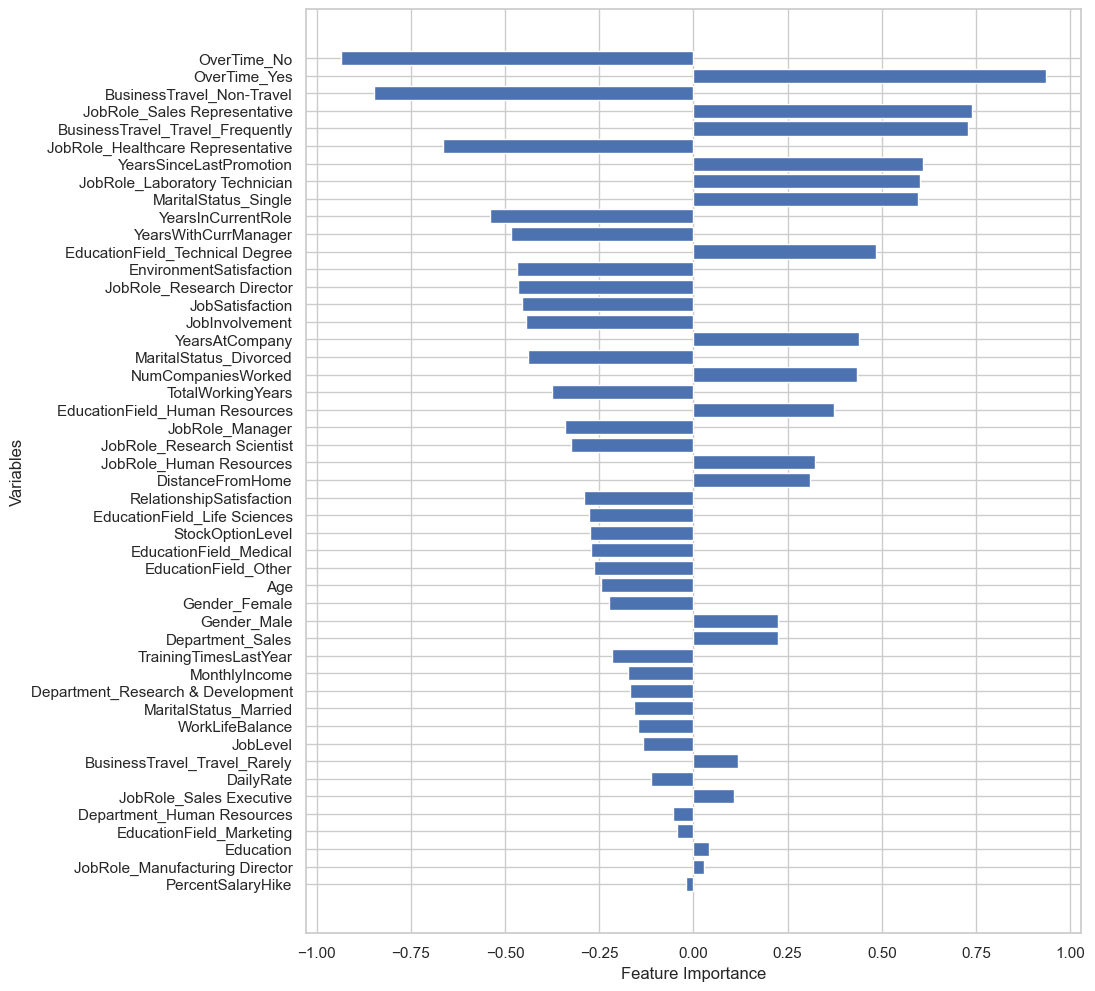

In [36]:
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Invert the y-axis to show the features with higher importance at the top
plt.show()

From the graph shown, we should focus on the ABSOLUTE value of the feature importance as it is how you rank the importance. The largest absolute coefficients will be the most important features. So, we can see that Overtime, Business Travel, and Years since Last Promotion are prominent variables to look out for.


OverTime: Both "OverTime_No" and "OverTime_Yes" are highly ranked in terms of absolute importance, indicating that whether an employee works overtime or not is a significant factor.

BusinessTravel: All three categories of BusinessTravel ("Non-Travel," "Travel_Frequently," and "Travel_Rarely") are important. This suggests that how often an employee travels for business is a significant predictor.

YearsSinceLastPromotion: This variable is also highly ranked, indicating that the number of years since the last promotion is an important factor.

Top 5 Positive Features:
                             Feature  Importance
44                      OverTime_Yes    0.934860
28      JobRole_Sales Representative    0.739452
30  BusinessTravel_Travel_Frequently    0.729682
4            YearsSinceLastPromotion    0.608662
22     JobRole_Laboratory Technician    0.600503

Top 5 Negative Features:
                              Feature  Importance
43                        OverTime_No   -0.935238
29          BusinessTravel_Non-Travel   -0.848271
20  JobRole_Healthcare Representative   -0.665528
5                  YearsInCurrentRole   -0.539251
3                YearsWithCurrManager   -0.485562


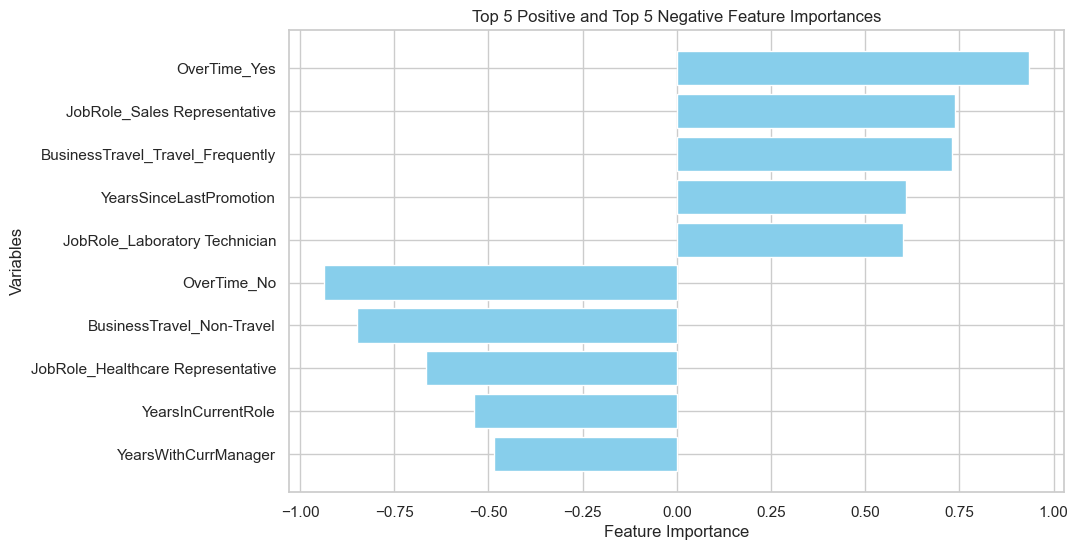

In [37]:

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': transformed_df.columns, 'Importance': feature_importance})

# Sort by absolute value of importance
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

# Separate positive and negative features
positive_features = feature_importance_df[feature_importance_df['Importance'] > 0].head(5)  # Top 5 positive
negative_features = feature_importance_df[feature_importance_df['Importance'] < 0].head(5)  # Top 5 negative

# Concatenate positive and negative features
top_features = pd.concat([positive_features, negative_features])

# Print the top 5 positive and top 5 negative features
print("Top 5 Positive Features:")
print(positive_features)
print("\nTop 5 Negative Features:")
print(negative_features)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Invert the y-axis to show the features with higher importance at the top
plt.title("Top 5 Positive and Top 5 Negative Feature Importances")
plt.show()

**Top 5 Positive Features:**

OverTime_Yes (Importance: 0.934879):
Employees who work overtime (OverTime_Yes) have a higher probability of being predicted as leaving the company.
This suggests that overtime work might be a significant factor contributing to attrition.

JobRole_Sales Representative (Importance: 0.739612):
Employees in the Sales Representative role have a higher probability of being predicted as leaving.
This indicates that employees in this role might have higher attrition rates compared to other roles.

BusinessTravel_Travel_Frequently (Importance: 0.729629):
Employees who travel frequently for business have a higher likelihood of being predicted as leaving.
Frequent business travel could potentially lead to job dissatisfaction or work-life balance issues.

YearsSinceLastPromotion (Importance: 0.608708):
The number of years since the last promotion has a positive impact on the prediction of attrition.
Employees who have not been promoted for a long time are more likely to leave the company.

JobRole_Laboratory Technician (Importance: 0.600676):
Employees in the Laboratory Technician role are more likely to be predicted as leaving.
This role might have specific challenges or factors that contribute to higher attrition rates.



**Top 5 Negative Features:**

OverTime_No (Importance: -0.935323):
Employees who do not work overtime (OverTime_No) have a higher probability of being predicted as staying.
This contrasts with the positive importance of 'OverTime_Yes', indicating that not working overtime is associated with lower attrition.

BusinessTravel_Non-Travel (Importance: -0.848187):
Employees who do not travel for business (BusinessTravel_Non-Travel) are more likely to be predicted as staying.
Non-traveling employees have a lower likelihood of leaving the company.

JobRole_Healthcare Representative (Importance: -0.665387):
Healthcare Representatives have a lower probability of being predicted as leaving.
This role seems to have lower attrition compared to other roles.

YearsInCurrentRole (Importance: -0.539116):
The number of years in the current role has a negative impact on the prediction of attrition.
Employees who have been in their current role for a longer time are less likely to leave.

YearsWithCurrManager (Importance: -0.485755):
The number of years with the current manager also has a negative impact on attrition prediction.
Longer tenure with the current manager suggests a lower likelihood of leaving.

In [38]:

# Sort by absolute value
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

# Create separate DataFrames for Job Roles, Departments, and Education Fields
job_roles_df = feature_importance_df[feature_importance_df['Feature'].str.startswith('JobRole_')]
departments_df = feature_importance_df[feature_importance_df['Feature'].str.startswith('Department_')]
education_fields_df = feature_importance_df[feature_importance_df['Feature'].str.startswith('EducationField_')]

# Create tables for Job Roles, Departments, and Education Fields
job_roles_table = job_roles_df.rename(columns={'Feature': 'Job Role', 'Importance': 'Attrition Coefficient'})
departments_table = departments_df.rename(columns={'Feature': 'Department', 'Importance': 'Attrition Coefficient'})
education_fields_table = education_fields_df.rename(columns={'Feature': 'Education Field', 'Importance': 'Attrition Coefficient'})

# Print the tables
print("Job Roles with Attrition Coefficients:")
print(job_roles_table)
print("\nDepartments with Attrition Coefficients:")
print(departments_table)
print("\nEducation Fields with Attrition Coefficients:")
print(education_fields_table)


Job Roles with Attrition Coefficients:
                             Job Role  Attrition Coefficient
28       JobRole_Sales Representative               0.739452
20  JobRole_Healthcare Representative              -0.665528
22      JobRole_Laboratory Technician               0.600503
25          JobRole_Research Director              -0.466334
23                    JobRole_Manager              -0.342244
26         JobRole_Research Scientist              -0.325058
21            JobRole_Human Resources               0.322161
27            JobRole_Sales Executive               0.107853
24     JobRole_Manufacturing Director               0.028815

Departments with Attrition Coefficients:
                           Department  Attrition Coefficient
42                   Department_Sales               0.223703
41  Department_Research & Development              -0.168933
40         Department_Human Resources              -0.055149

Education Fields with Attrition Coefficients:
                  

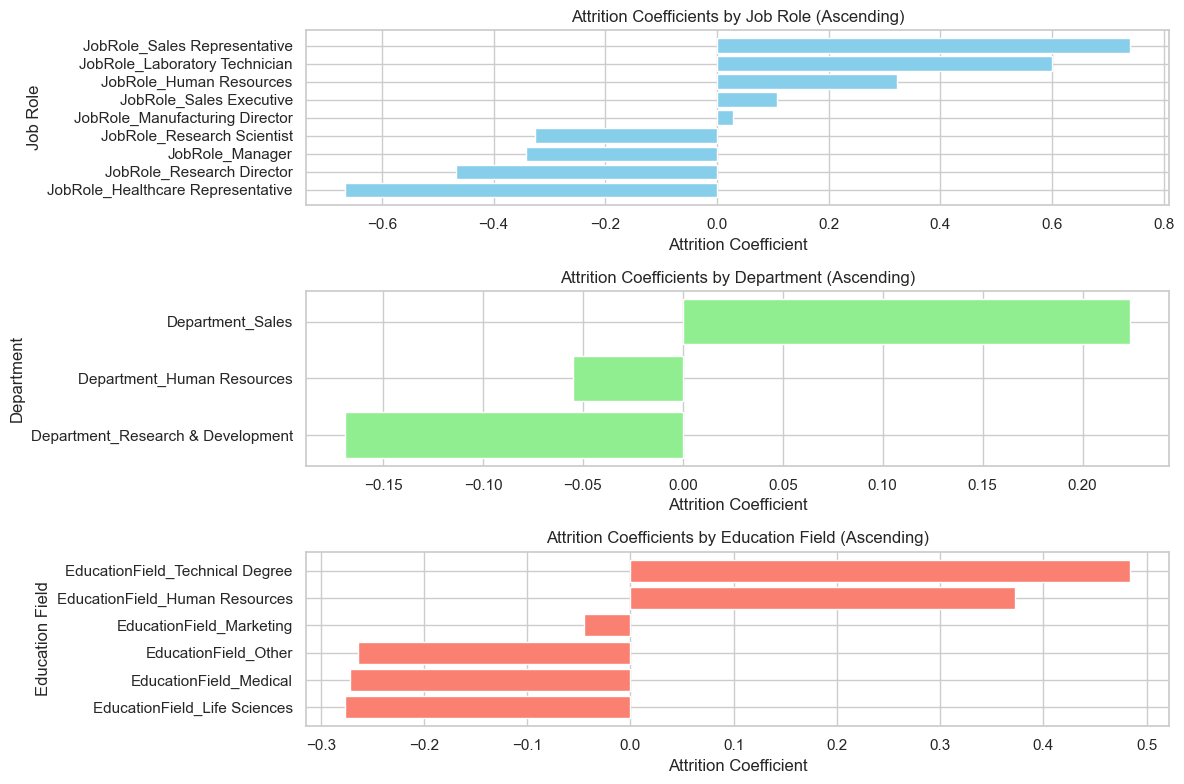

In [39]:
# Sort the tables by 'Attrition Coefficient' in ascending order
job_roles_table_sorted = job_roles_table.sort_values('Attrition Coefficient')
departments_table_sorted = departments_table.sort_values('Attrition Coefficient')
education_fields_table_sorted = education_fields_table.sort_values('Attrition Coefficient')

# Create plots for Job Roles, Departments, and Education Fields in ascending order
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.barh(job_roles_table_sorted['Job Role'], job_roles_table_sorted['Attrition Coefficient'], color='skyblue')
plt.xlabel("Attrition Coefficient")
plt.ylabel("Job Role")
plt.title("Attrition Coefficients by Job Role (Ascending)")

plt.subplot(3, 1, 2)
plt.barh(departments_table_sorted['Department'], departments_table_sorted['Attrition Coefficient'], color='lightgreen')
plt.xlabel("Attrition Coefficient")
plt.ylabel("Department")
plt.title("Attrition Coefficients by Department (Ascending)")

plt.subplot(3, 1, 3)
plt.barh(education_fields_table_sorted['Education Field'], education_fields_table_sorted['Attrition Coefficient'], color='salmon')
plt.xlabel("Attrition Coefficient")
plt.ylabel("Education Field")
plt.title("Attrition Coefficients by Education Field (Ascending)")

plt.tight_layout()
plt.show()


In [40]:
#Find indices of test data where attrition is positive
np.where(y_test==1)

(array([  5,   6,   7,  11,  14,  15,  20,  36,  52,  59,  61,  79,  97,
        109, 116, 128, 129, 134, 141, 146, 159, 160, 162, 175, 179, 181,
        190, 192, 198, 206, 207, 213, 214, 215, 228, 236, 242, 246, 257,
        265, 267, 270, 273, 274, 278, 284, 289], dtype=int64),)

In [41]:
# Use trained model to predict probabilities on test data
employee_index = 97  # Index of the employee you want to predict for
employee_features = [x_test[employee_index]]  
attrition_probability = log_reg.predict_proba(employee_features)[0, 1] * 100


# Print information about the employee
print("Information of employee:\n")
print(test_df.iloc[employee_index])

# Print probability of attrition
print(f'\n\n\nThe employee has {attrition_probability:.1f}% chances of attrition.')

Information of employee:

Age                                             20
Attrition                                      Yes
BusinessTravel                       Travel_Rarely
DailyRate                                      129
Department                  Research & Development
DistanceFromHome                                 4
Education                                        3
EducationField                    Technical Degree
EnvironmentSatisfaction                          1
Gender                                        Male
JobInvolvement                                   3
JobLevel                                         1
JobRole                      Laboratory Technician
JobSatisfaction                                  1
MaritalStatus                               Single
MonthlyIncome                                 2973
NumCompaniesWorked                               1
OverTime                                        No
PercentSalaryHike                               19
Relat

In [42]:
# Use trained model to predict probabilities on test data
employee_index = 285  # Index of the employee you want to predict for
employee_features = [x_test[employee_index]]  
attrition_probability = log_reg.predict_proba(employee_features)[0, 1] * 100

# Print information about the employee
print("Information of employee:\n")
print(test_df.iloc[employee_index])

# Print probability of attrition
print(f'\n\n\nThe employee has {attrition_probability:.1f}% chances of attrition.')

Information of employee:

Age                                       30
Attrition                                 No
BusinessTravel                 Travel_Rarely
DailyRate                               1082
Department                             Sales
DistanceFromHome                          12
Education                                  3
EducationField              Technical Degree
EnvironmentSatisfaction                    2
Gender                                Female
JobInvolvement                             3
JobLevel                                   2
JobRole                      Sales Executive
JobSatisfaction                            3
MaritalStatus                         Single
MonthlyIncome                           6577
NumCompaniesWorked                         0
OverTime                                  No
PercentSalaryHike                         11
RelationshipSatisfaction                   2
StockOptionLevel                           0
TotalWorkingYears            

## **Overall Analysis:**

Overtime: Working overtime (OverTime_Yes) is a significant factor contributing to attrition, while not working overtime (OverTime_No) is associated with lower attrition.

Business Travel: Frequent business travel (BusinessTravel_Travel_Frequently) is linked to higher attrition, while non-traveling employees (BusinessTravel_Non-Travel) are more likely to stay.

Job Roles: Specific job roles like Sales Representatives and Laboratory Technicians show higher attrition, while Healthcare Representatives have lower attrition.

Promotion and Tenure: Longer periods since the last promotion and longer tenure in current roles or with current managers are associated with higher employee retention.

Departments: Sales department shows a higher likelihood of attrition, while Research & Development and Human Resources have lower attrition coefficients.

Education Fields: Employees with Technical Degrees and Human Resources education tend to have higher attrition, while those in Life Sciences, Medical, and Other fields have lower attrition coefficients.

## **Conclusion**
In conclusion, this analysis provides valuable insights into the factors influencing employee attrition within the organization. Leveraging HR analytics and machine learning, we have identified key features that contribute significantly to attrition, both positively and negatively.

The top positive features, such as Overtime_Yes, BusinessTravel_Travel_Frequently, YearsSinceLastPromotion, and specific job roles like Sales Representatives and Laboratory Technicians, indicate areas where proactive retention strategies can be implemented. These features suggest that employees working overtime, traveling frequently for business, or who have not been promoted recently are more likely to consider leaving. Addressing these factors with targeted interventions can improve employee retention and job satisfaction.

Conversely, negative features like lack of overtime (OverTime_No), non-business travel (BusinessTravel_Non-Travel), and longer tenure in roles or with managers (YearsInCurrentRole, YearsWithCurrManager) also play a crucial role in attrition prediction. Employees who do not work overtime, do not travel for business, or have long tenures in their current roles or with their managers are less likely to leave. Understanding these factors allows HR to tailor strategies to retain valuable talent and mitigate turnover risks.

**Below are recommendations aiming to improve work-life balance, career advancement opportunities, and managerial support to enhance employee satisfaction and retention:**

Address Overtime Issues: Consider evaluating workload and overtime policies to reduce stress and improve work-life balance.

Business Travel Policies: Review business travel requirements and their impact on employees' job satisfaction and retention.

Job Role Analysis: Investigate the specific challenges or reasons behind high attrition rates in Sales Representative and Laboratory Technician roles and develop targeted retention programs.

Promotion and Career Growth: Implement programs to provide regular promotions and career growth opportunities to reduce attrition related to stagnation.

Managerial Support: Recognize the importance of supportive managers and encourage longer tenure with the same manager to improve retention.